# New Section

# ***Part -1 : Heart data analysis***

In [32]:
#importing all the relevant packages to be used

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.impute import SimpleImputer
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [33]:
df = pd.read_csv("/content/Heart.csv")

In [34]:
#Dropping the first column

df = df.iloc[:, 1:]
print(df)

     Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  \
0     63    1       typical     145   233    1        2    150      0   
1     67    1  asymptomatic     160   286    0        2    108      1   
2     67    1  asymptomatic     120   229    0        2    129      1   
3     37    1    nonanginal     130   250    0        0    187      0   
4     41    0    nontypical     130   204    0        2    172      0   
..   ...  ...           ...     ...   ...  ...      ...    ...    ...   
298   45    1       typical     110   264    0        0    132      0   
299   68    1  asymptomatic     144   193    1        0    141      0   
300   57    1  asymptomatic     130   131    0        0    115      1   
301   57    0    nontypical     130   236    0        2    174      0   
302   38    1    nonanginal     138   175    0        0    173      0   

     Oldpeak  Slope   Ca        Thal  AHD  
0        2.3      3  0.0       fixed   No  
1        1.5      2  3.0      norma

In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB
None


In [36]:
print(df.describe())

              Age         Sex      RestBP        Chol         Fbs     RestECG  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868  131.689769  246.693069    0.148515    0.990099   
std      9.038662    0.467299   17.599748   51.776918    0.356198    0.994971   
min     29.000000    0.000000   94.000000  126.000000    0.000000    0.000000   
25%     48.000000    0.000000  120.000000  211.000000    0.000000    0.000000   
50%     56.000000    1.000000  130.000000  241.000000    0.000000    1.000000   
75%     61.000000    1.000000  140.000000  275.000000    0.000000    2.000000   
max     77.000000    1.000000  200.000000  564.000000    1.000000    2.000000   

            MaxHR       ExAng     Oldpeak       Slope          Ca  
count  303.000000  303.000000  303.000000  303.000000  299.000000  
mean   149.607261    0.326733    1.039604    1.600660    0.672241  
std     22.875003    0.469794    1.161075    0.616226    0.937438 

In [37]:
print(df.isnull().sum())

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64


In [38]:
#*****imputation*****

numerical_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns
numerical_small_unique = [col for col in numerical_cols if df[col].nunique() <= 3]
numerical_imputer_mode = SimpleImputer(strategy='most_frequent')
numerical_imputer_mean = SimpleImputer(strategy='mean')

for col in numerical_cols:
    if col in numerical_small_unique:
        df[col] = numerical_imputer_mode.fit_transform(df[col].values.reshape(-1, 1))
    else:
        df[col] = numerical_imputer_mean.fit_transform(df[col].values.reshape(-1, 1))

categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])
# Dropping rows with missing values
#df.dropna(inplace=True)

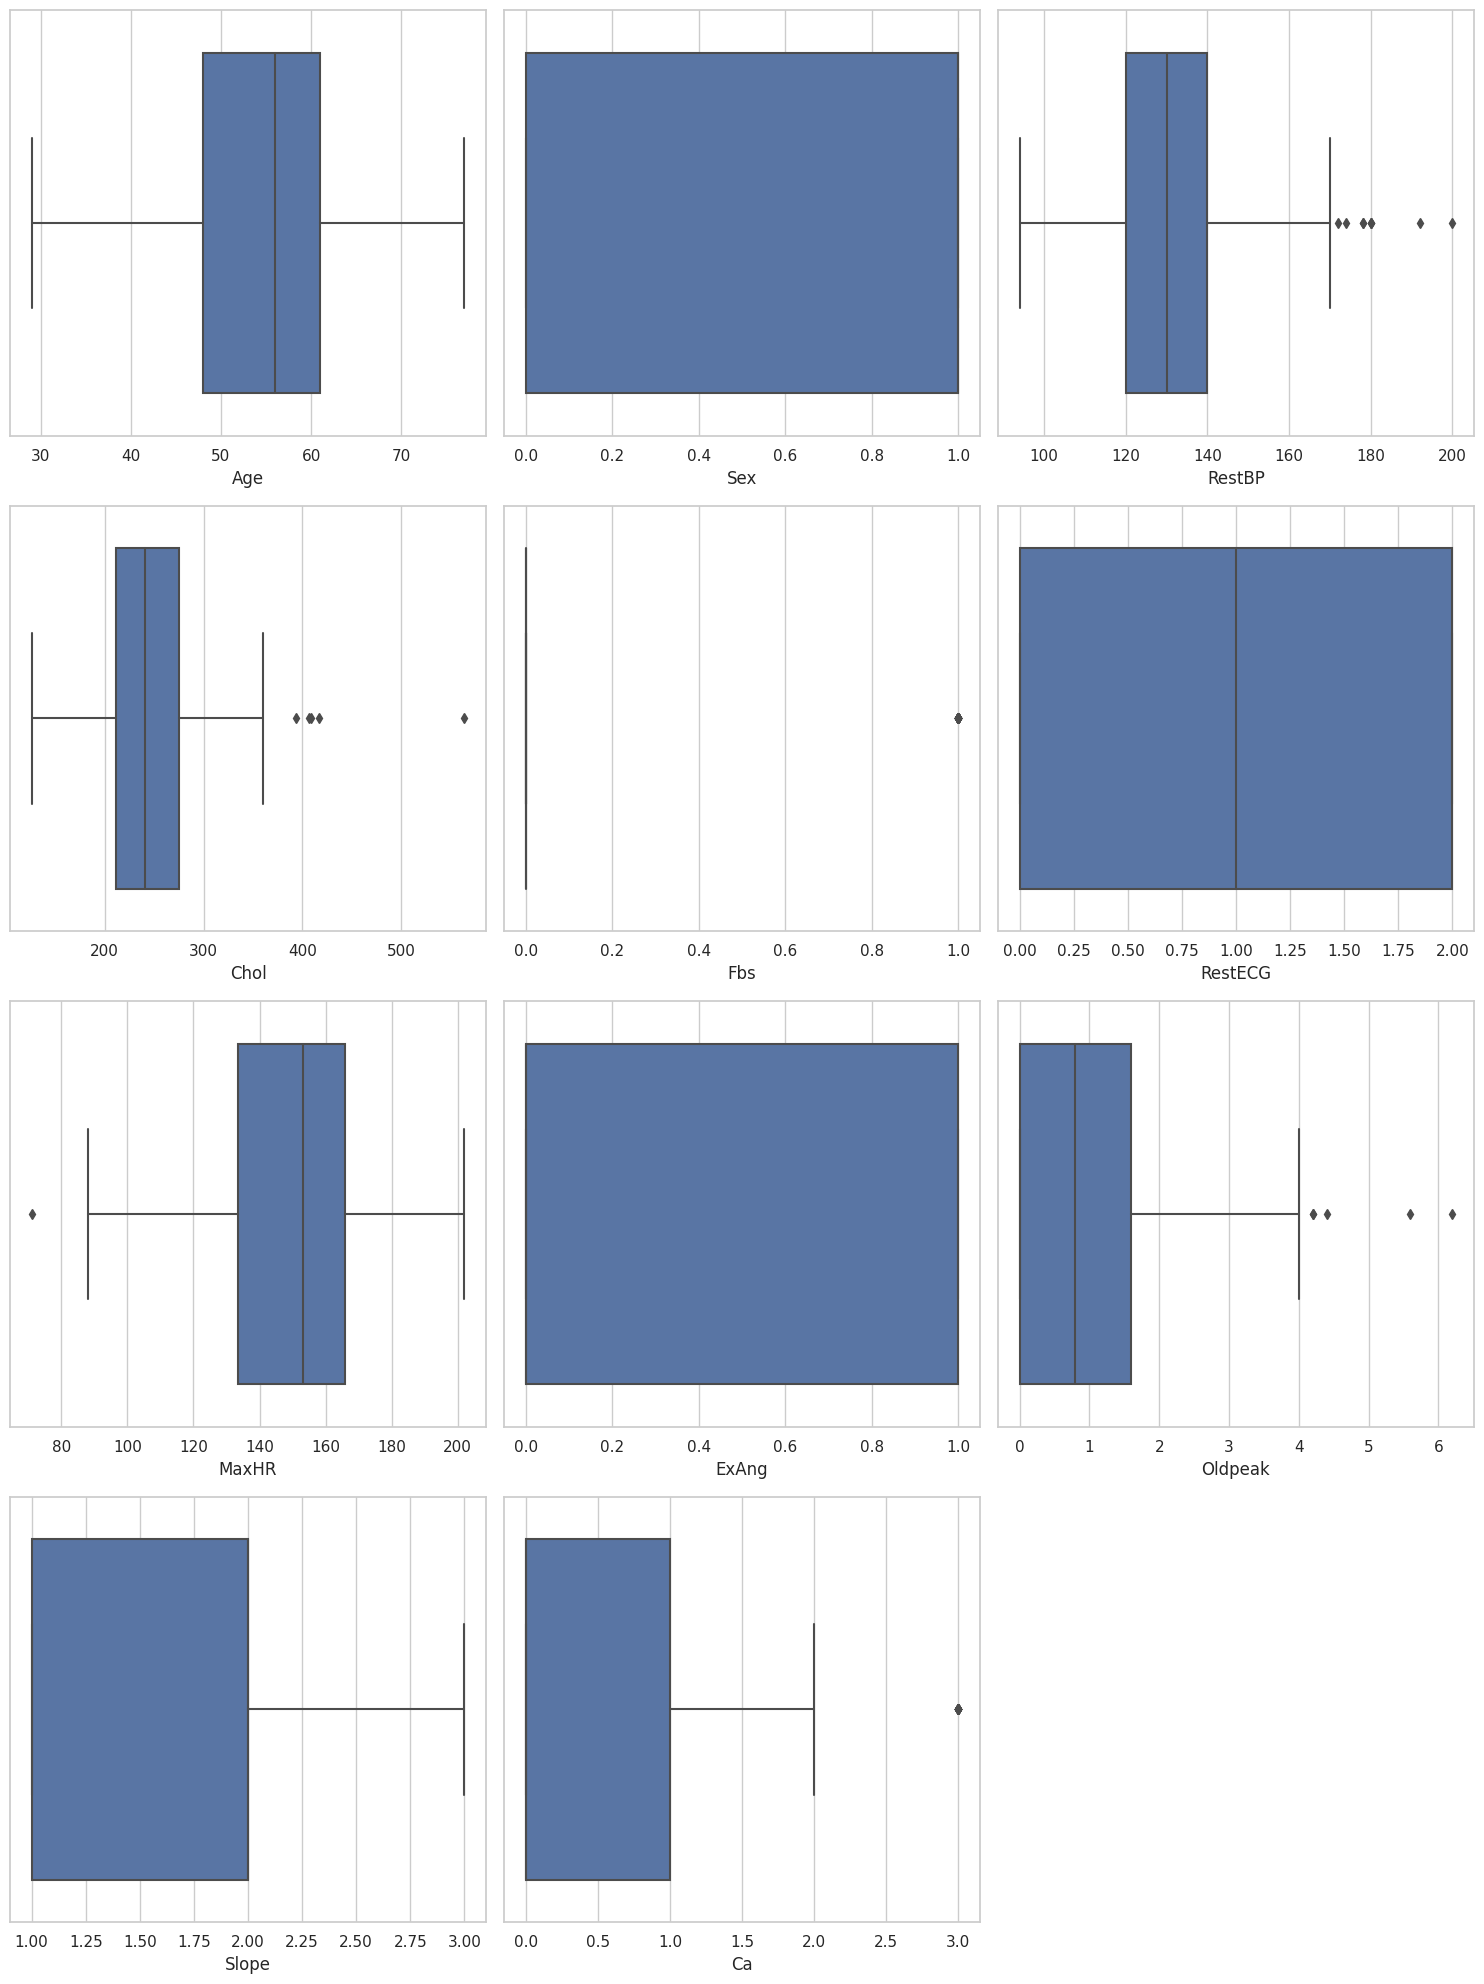

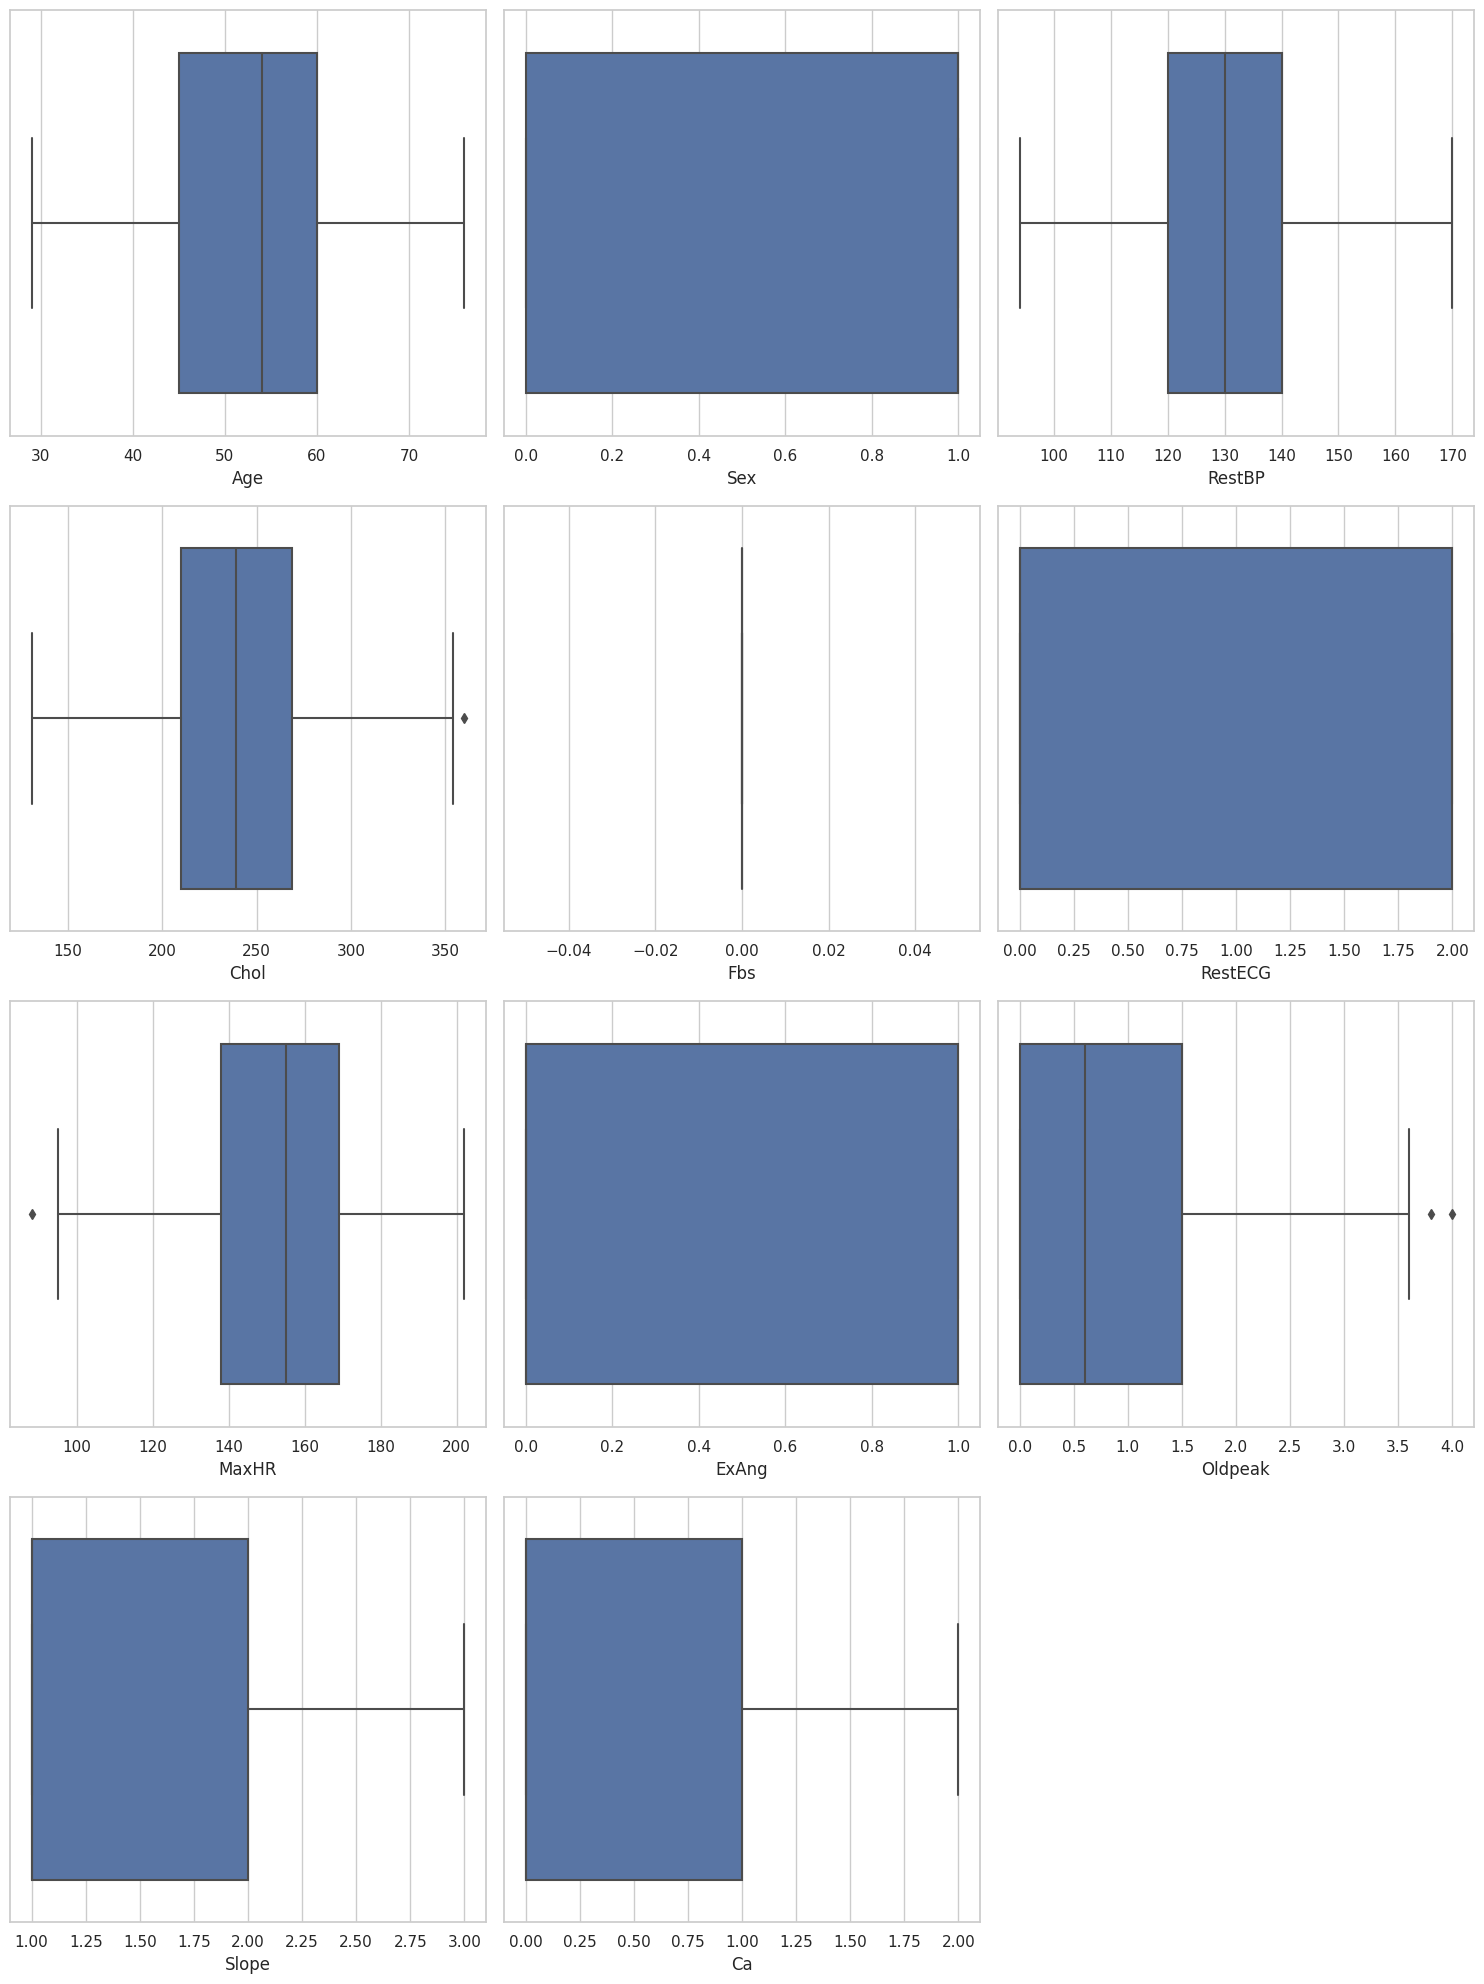

In [39]:
#****** univariate data analysis ******

#Part_1:Box plots and outliers removal through IQR method

#Displaying and creating with dynamic layout adjustment
num_cols = len(numerical_cols)
num_rows = 2
num_cols_per_row = 3
num_subplot_rows = math.ceil(num_cols / num_cols_per_row)
plt.figure(figsize=(15, 5 * num_subplot_rows))
sns.set(style="whitegrid")
for i, col in enumerate(numerical_cols):
    plt.subplot(num_subplot_rows, num_cols_per_row, i + 1)
    sns.boxplot(x=df[col])
plt.tight_layout()
plt.show()

#IQR
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5
df_no_outliers = df[~((df[numerical_cols] < (Q1 - outlier_threshold * IQR)) | (df[numerical_cols] > (Q3 + outlier_threshold * IQR))).any(axis=1)]

#Displaying and creating with dynamic layout adjustment after removal of outliers
plt.figure(figsize=(15, 5 * num_subplot_rows))
sns.set(style="whitegrid")
for i, col in enumerate(numerical_cols):
    plt.subplot(num_subplot_rows, num_cols_per_row, i + 1)
    sns.boxplot(x=df_no_outliers[col])
plt.tight_layout()
plt.show()

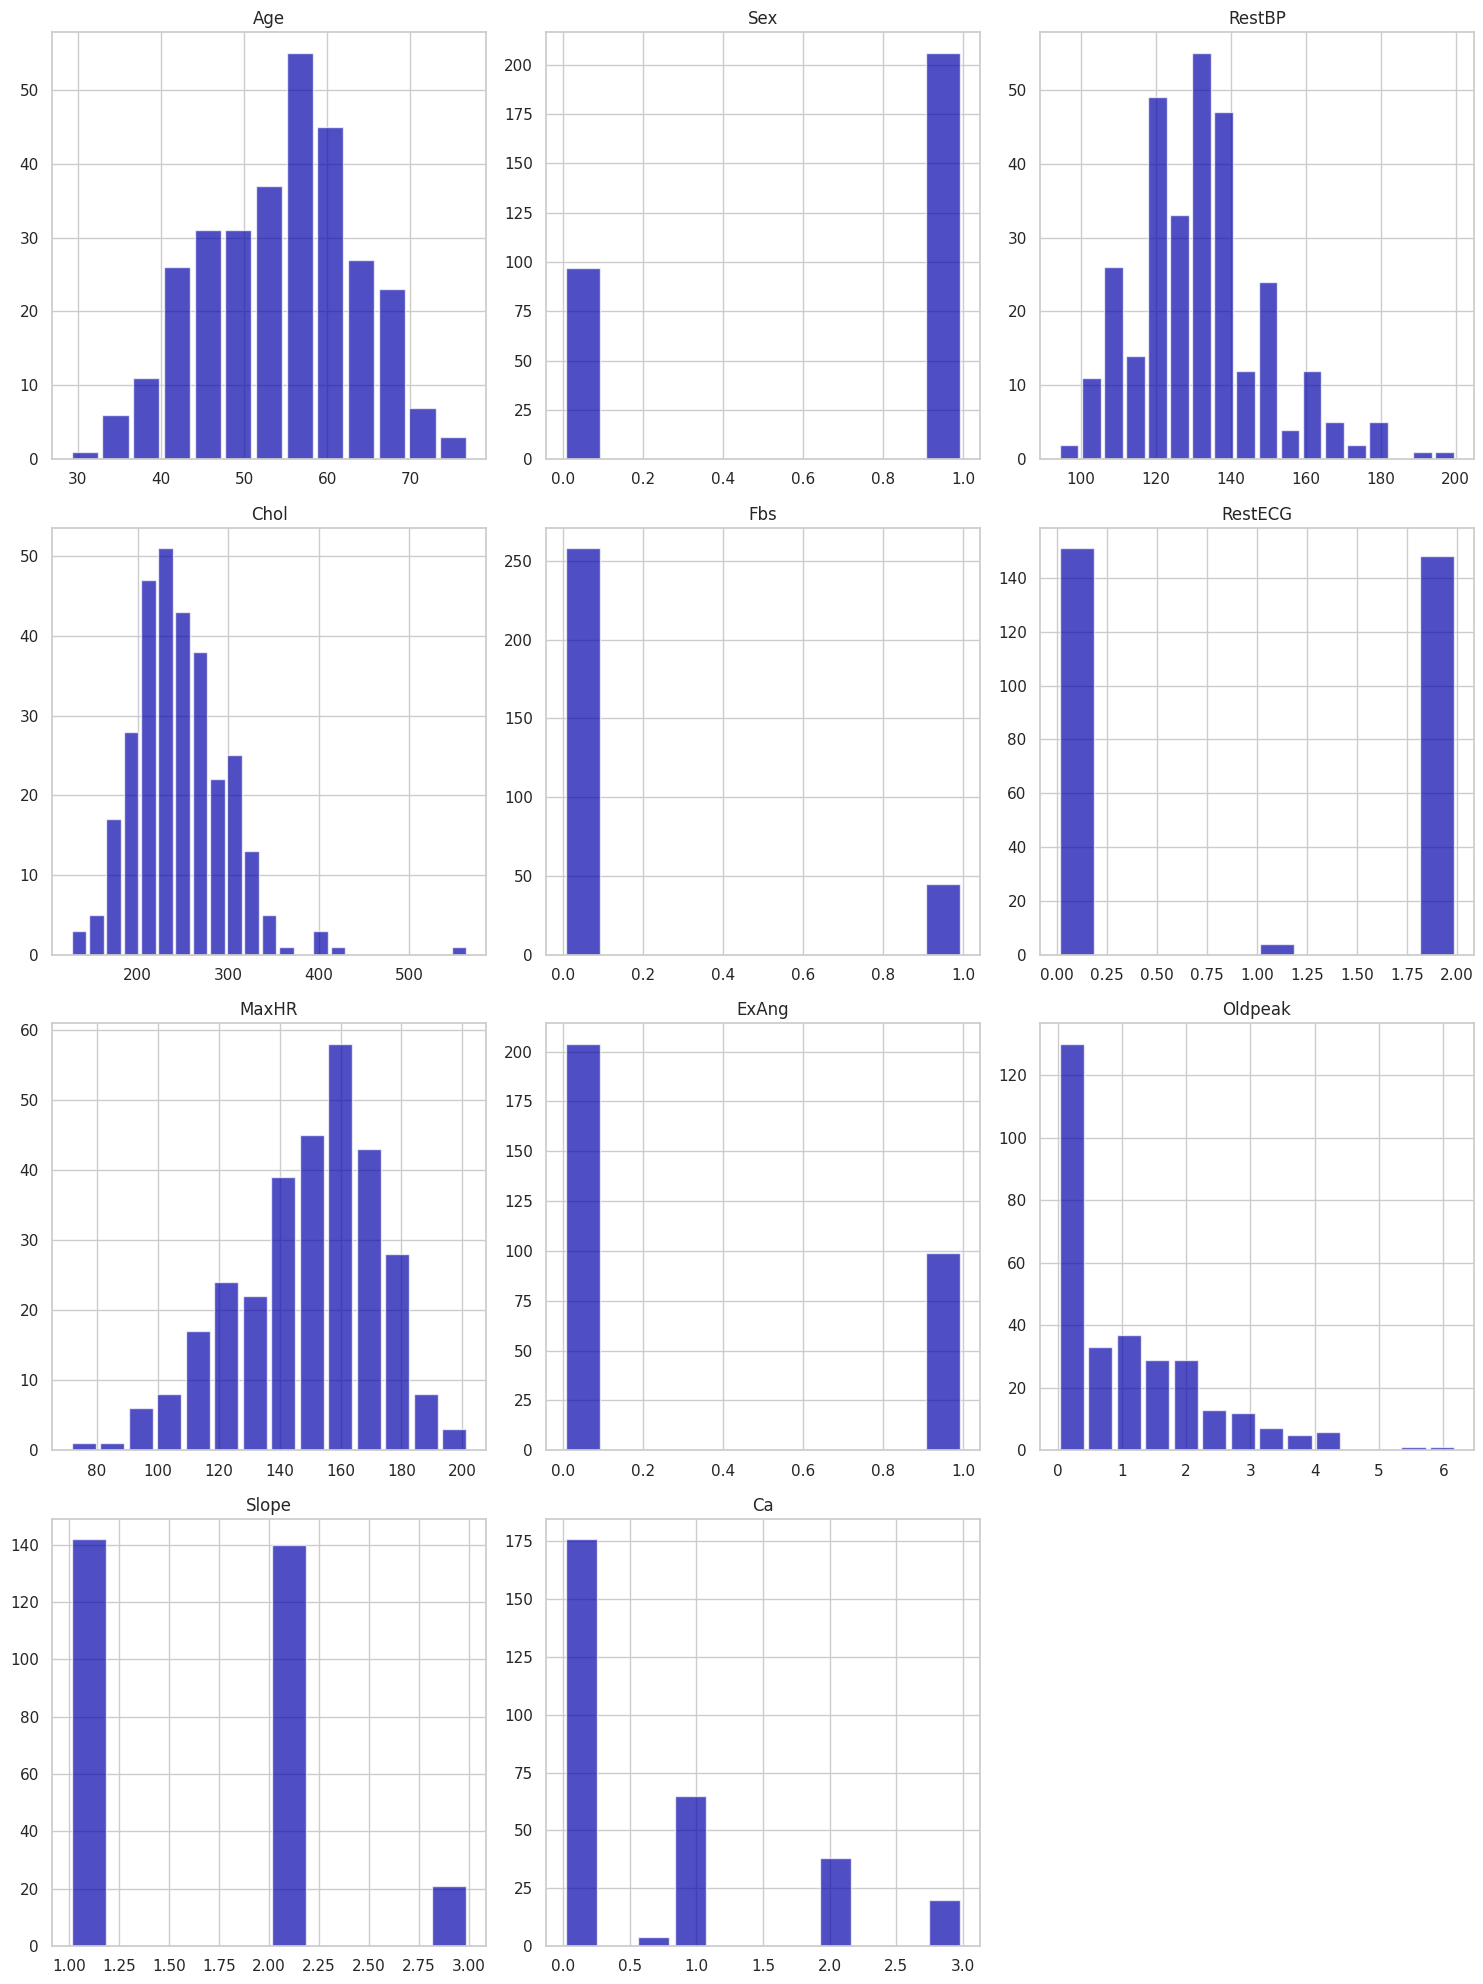

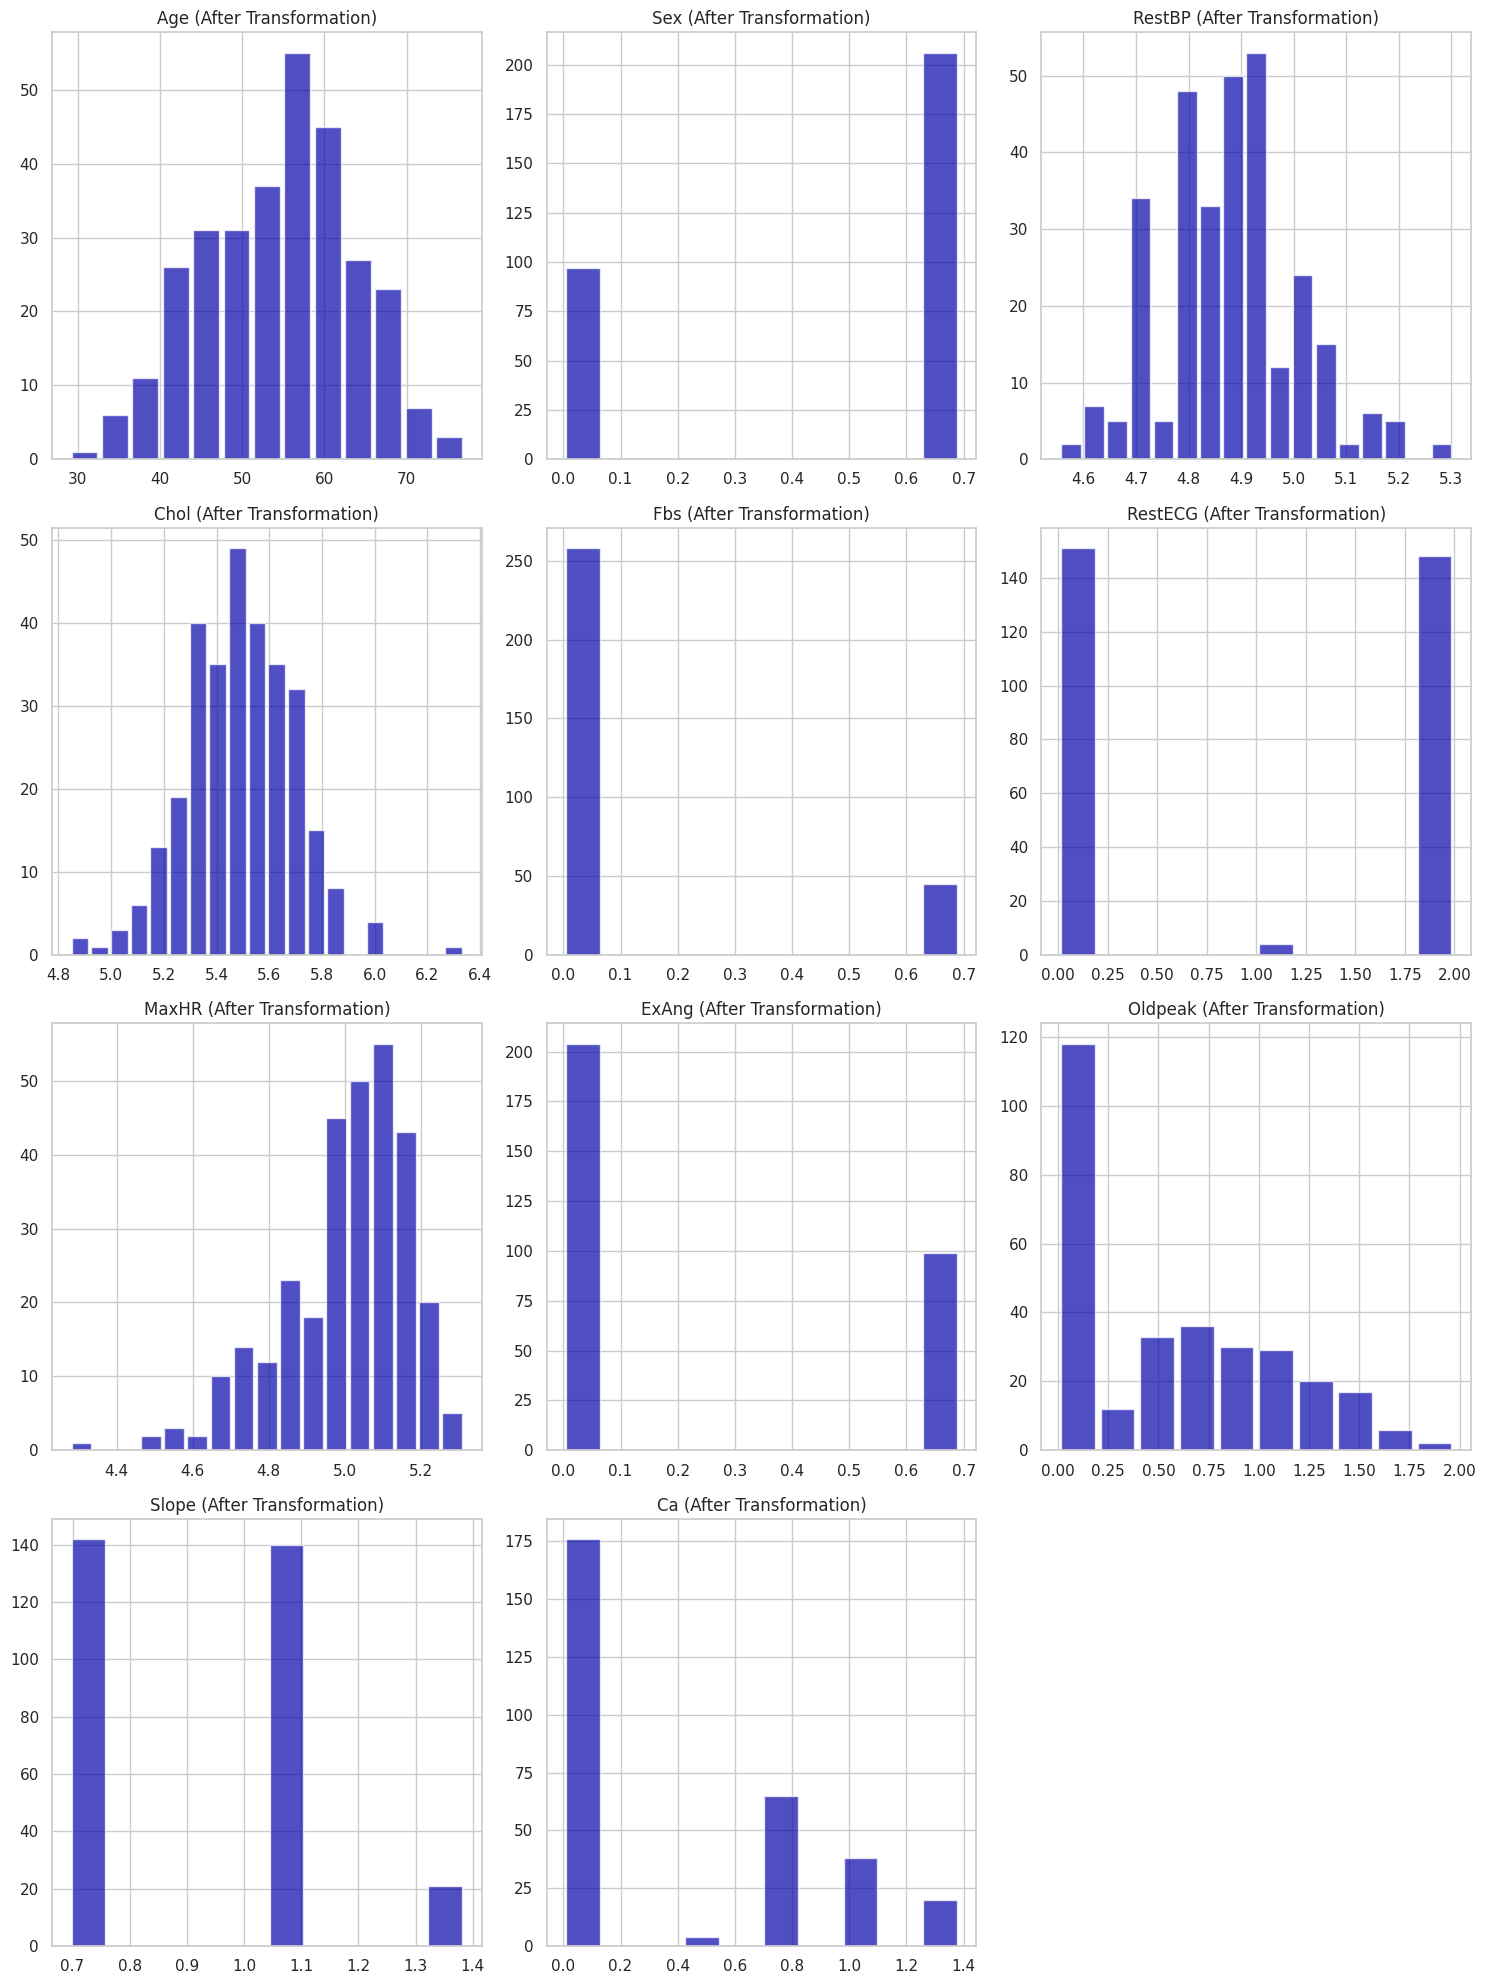

In [40]:
#part_2:Histogram plot and transformation of skewed columns

# Displaying and creating histogram for numerical columns
plt.figure(figsize=(15, 5 * num_subplot_rows))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_subplot_rows, num_cols_per_row, i + 1)  # Adjust subplot layout dynamically
    plt.hist(df[col], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
    plt.title(col)
plt.tight_layout()
plt.show()

# Checking and transforming skewed numerical columns crossing the skewness threshold using logarithmic transformation
skewness_threshold = 0.5
skewed_cols = df[numerical_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_cols = skewed_cols[abs(skewed_cols) > skewness_threshold].index
for col in skewed_cols:
    df[col] = np.log1p(df[col])

# Displaying and creating histograms for numerical columns after transformation is done
plt.figure(figsize=(15, 5 * num_subplot_rows))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_subplot_rows, num_cols_per_row, i + 1)  # Adjusting subplot layout dynamically
    plt.hist(df[col], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
    plt.title(col + ' (After Transformation)')
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

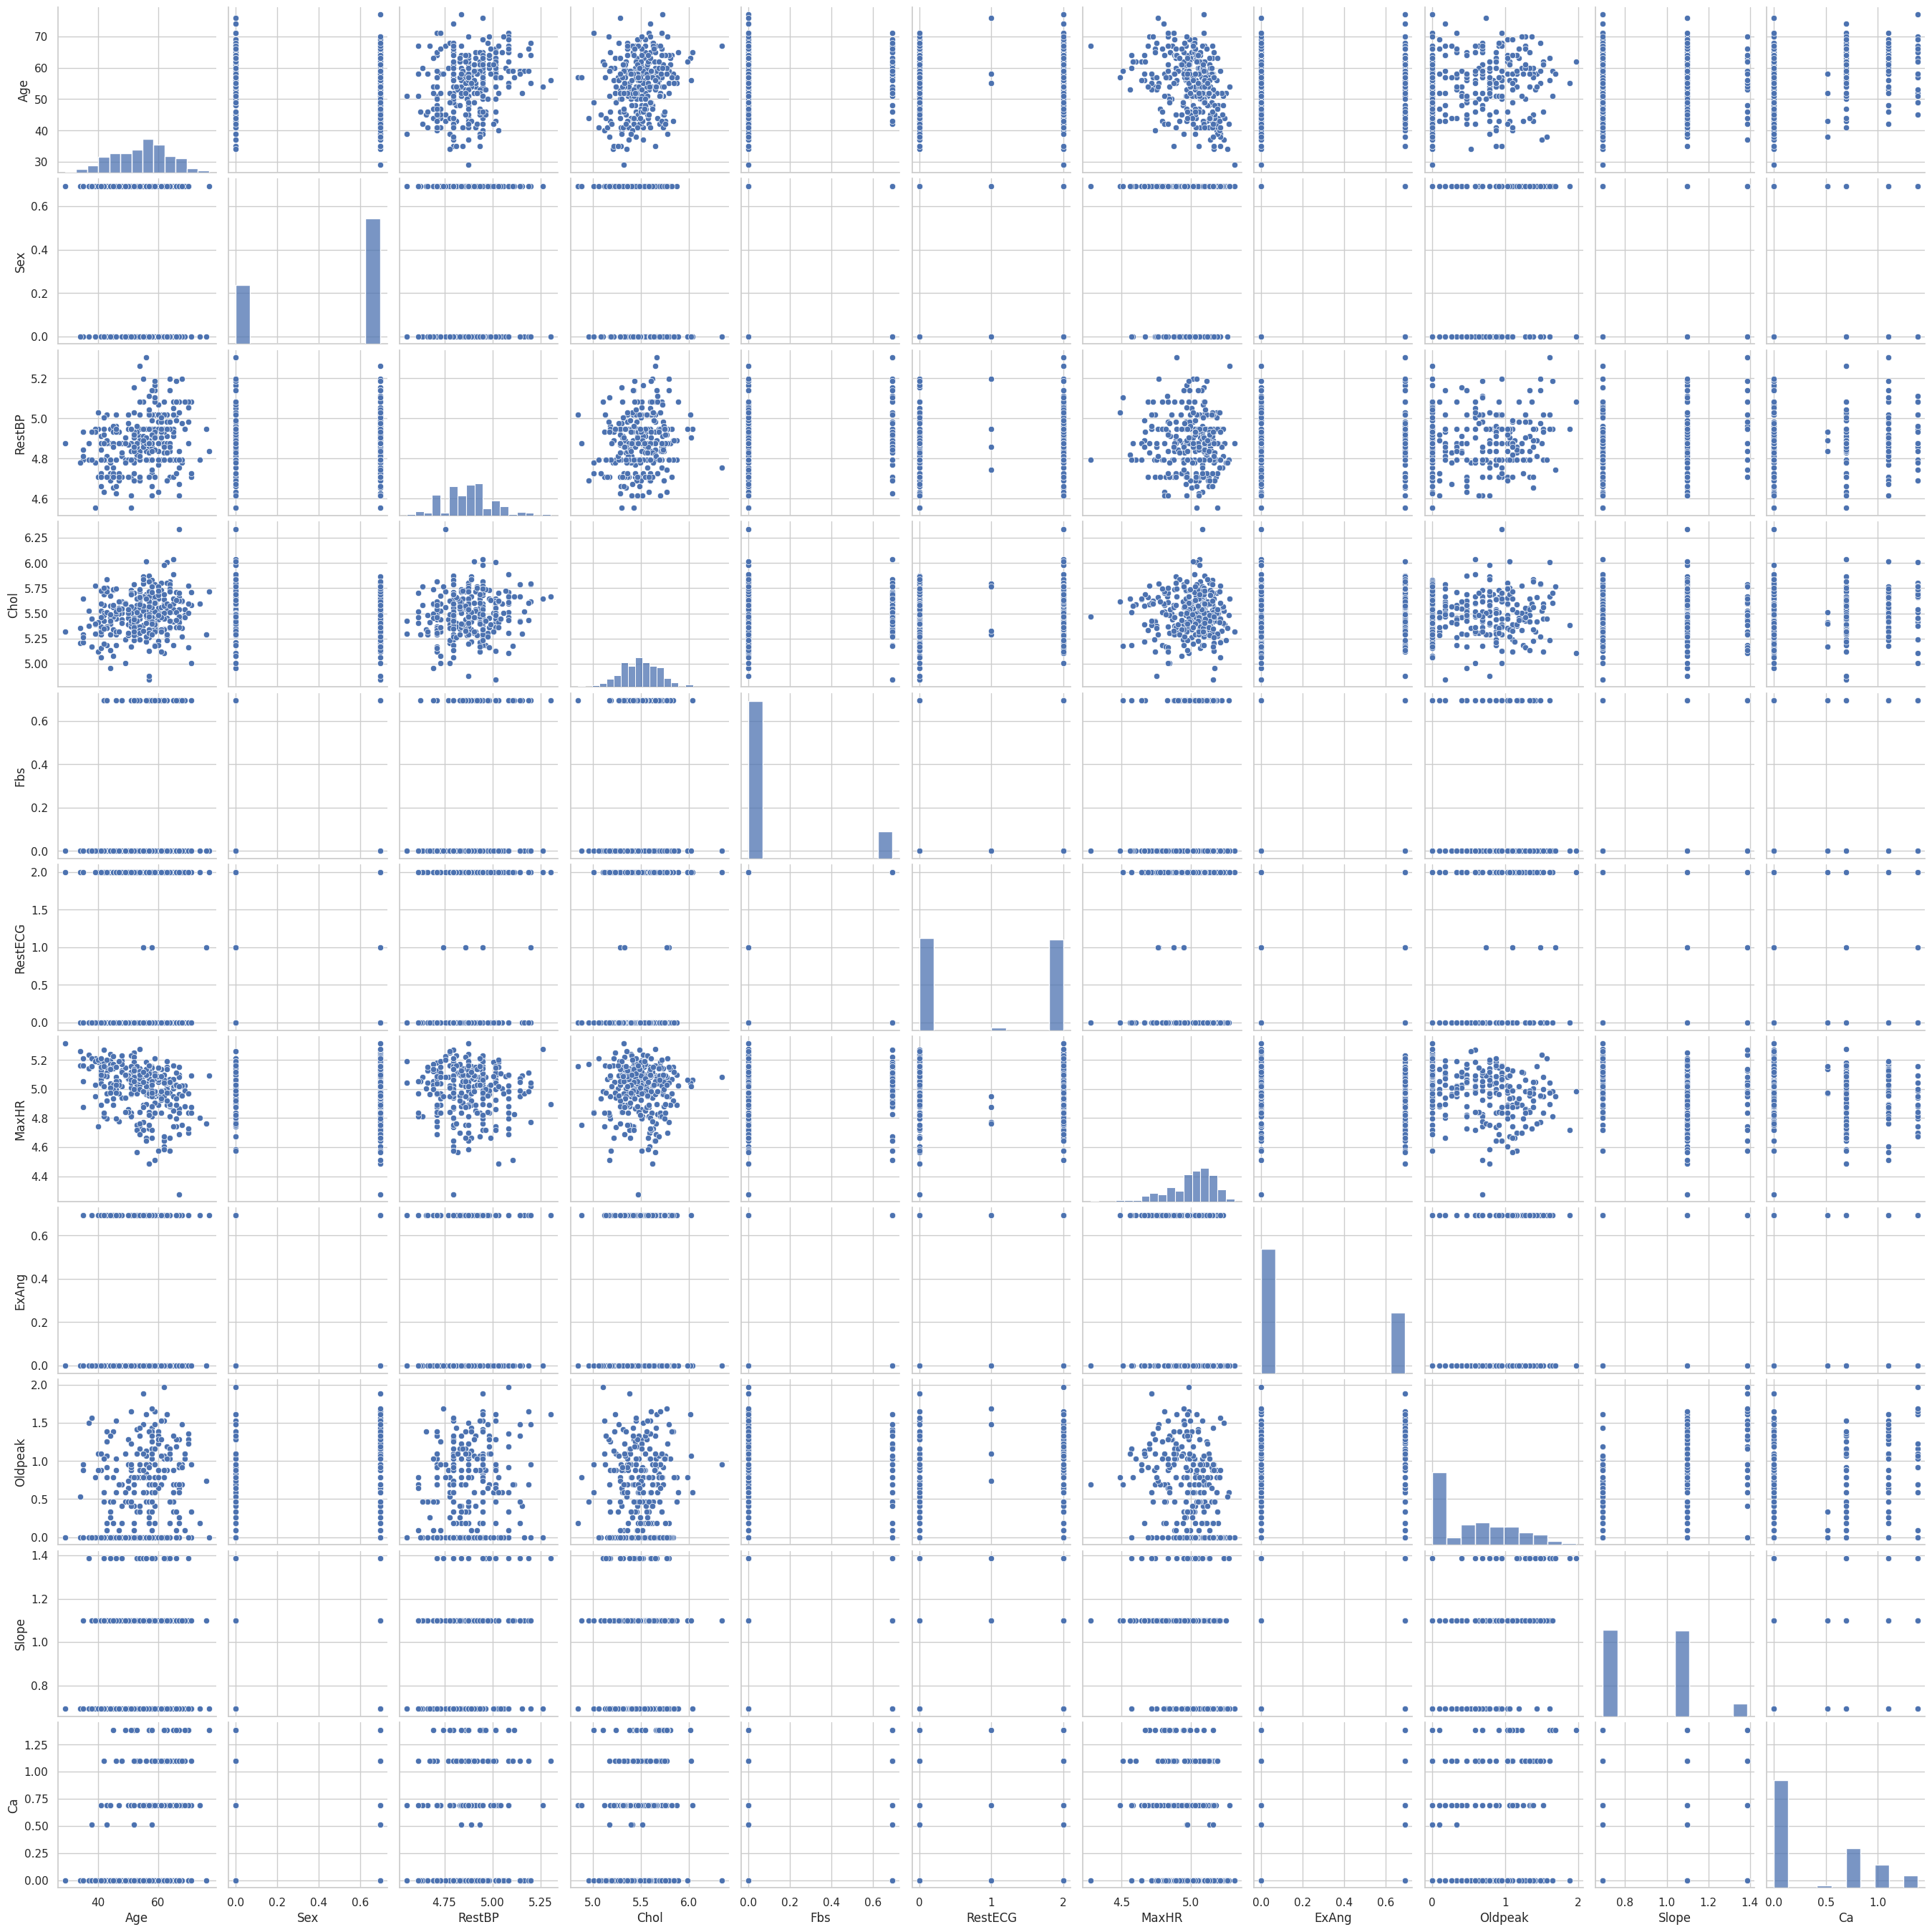

In [41]:
#****** Bivariate data Analysis ******

#displaying and creating scatter plot
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
sns.pairplot(df[numerical_cols])
plt.show()

<ipython-input-42-837507dcf561>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


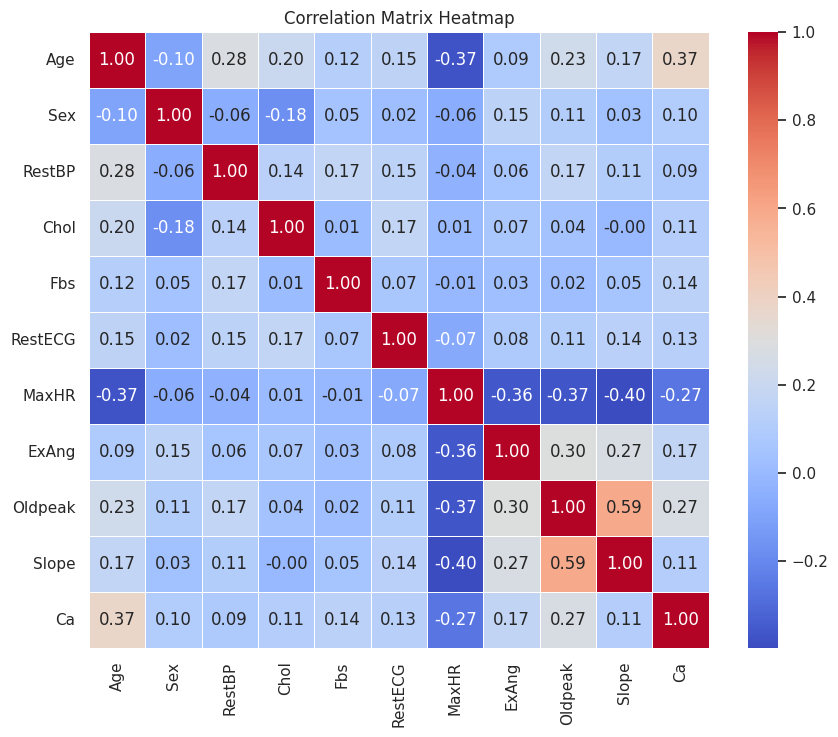

<ipython-input-42-837507dcf561>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_no_high_correlation.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


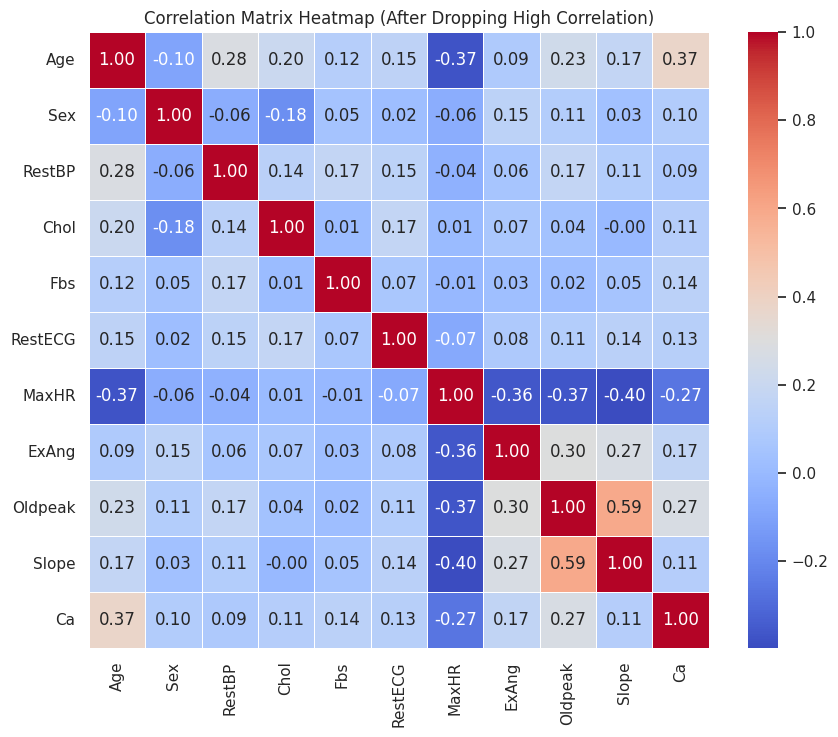

In [42]:
#****** Multivariate data Analysis ******

# Calculating correlation matrix and displaying its heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Identifying and dropping columns with high correlation with the threshold of 0.7
correlation_threshold = 0.7
highly_correlated_cols = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_cols.add(colname_j)
df_no_high_correlation = df.drop(columns=highly_correlated_cols)

# Displaying heatmap of the correlation matrix after dropping columns
plt.figure(figsize=(10, 8))
sns.heatmap(df_no_high_correlation.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (After Dropping High Correlation)")
plt.show()

In [43]:
#****** Feature Scaling ******

# Identifying numerical columns and doing feature scaling it for them
numerical_cols_for_scaling = df_no_high_correlation.select_dtypes(include='number').columns
scaler = StandardScaler()
df_scaled = df_no_high_correlation.copy()
df_scaled[numerical_cols_for_scaling] = scaler.fit_transform(df_no_high_correlation[numerical_cols_for_scaling])
print(df_scaled.head())

        Age       Sex     ChestPain    RestBP      Chol       Fbs   RestECG  \
0  0.948726  0.686202       typical  0.804148 -0.179214  2.394438  1.016684   
1  1.392002  0.686202  asymptomatic  1.559828  0.830366 -0.417635  1.016684   
2  1.392002  0.686202  asymptomatic -0.647099 -0.264475 -0.417635  1.016684   
3 -1.932564  0.686202    nonanginal -0.033526  0.167589 -0.417635 -0.996749   
4 -1.489288 -1.457296    nontypical -0.033526 -0.833495 -0.417635  1.016684   

      MaxHR     ExAng   Oldpeak     Slope        Ca        Thal  AHD  
0  0.093314 -0.696631  1.192005  1.972558 -0.790807       fixed   No  
1 -1.905199  1.435481  0.661637  0.732902  2.058428      normal  Yes  
2 -0.824878  1.435481  1.358226  0.732902  1.467158  reversable  Yes  
3  1.437147 -0.696631  1.784504  1.972558 -0.790807      normal   No  
4  0.927295 -0.696631  0.583653 -1.014296 -0.790807      normal   No  


In [44]:
#****** Models and prediction evaluation ******

# Separating features and target variable
X = df_scaled.drop('AHD', axis=1)
y = df_scaled['AHD']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Identifying categorical columns
categorical_cols = X.select_dtypes(include='object').columns
# One-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_cols)
    ],
    remainder='passthrough'
)
# Fitting and transforming on training data
X_train_encoded = preprocessor.fit_transform(X_train)
# Transforming on testing data
X_test_encoded = preprocessor.transform(X_test)

# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_encoded, y_train)

# Predictions on training and testing data
y_pred_logistic_train = logistic_model.predict(X_train_encoded)
y_pred_logistic_test = logistic_model.predict(X_test_encoded)

# Evaluating Logistic Regression on training data
print("Logistic Regression - Training Data:")
print("Accuracy:", accuracy_score(y_train, y_pred_logistic_train))
print("Classification Report:\n", classification_report(y_train, y_pred_logistic_train))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_logistic_train))

# Evaluating Logistic Regression on testing data
print("\nLogistic Regression - Testing Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic_test))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic_test))

# Decision Tree Classification
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_encoded, y_train)

# Predictions on training and testing data
y_pred_tree_train = tree_model.predict(X_train_encoded)
y_pred_tree_test = tree_model.predict(X_test_encoded)

# Evaluating Decision Tree Classification on training data
print("\nDecision Tree Classification - Training Data:")
print("Accuracy:", accuracy_score(y_train, y_pred_tree_train))
print("Classification Report:\n", classification_report(y_train, y_pred_tree_train))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_tree_train))

# Evaluating Decision Tree Classification on testing data
print("\nDecision Tree Classification - Testing Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree_test))
print("Classification Report:\n", classification_report(y_test, y_pred_tree_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree_test))

Logistic Regression - Training Data:
Accuracy: 0.8429752066115702
Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.90      0.87       135
         Yes       0.86      0.77      0.81       107

    accuracy                           0.84       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.84      0.84      0.84       242

Confusion Matrix:
 [[122  13]
 [ 25  82]]

Logistic Regression - Testing Data:
Accuracy: 0.9016393442622951
Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.93      0.90        29
         Yes       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion Matrix:
 [[27  2]
 [ 4 28]]

Decision Tree Classification - Training Data:
Accuracy: 1.0
Classification Report:
  

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


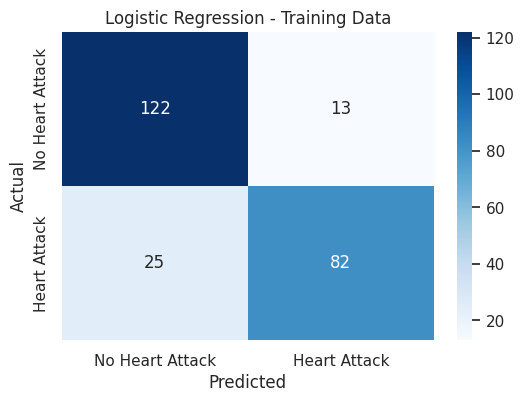

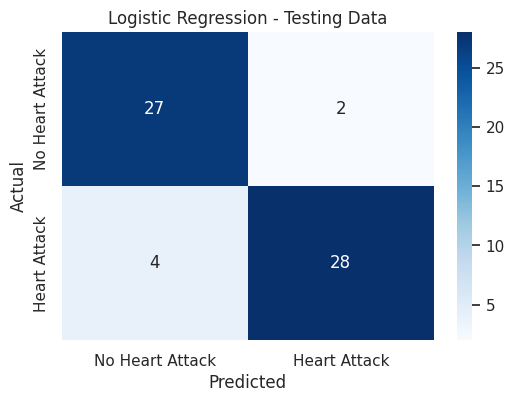

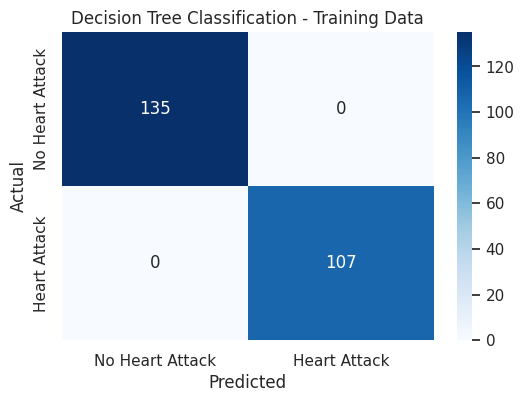

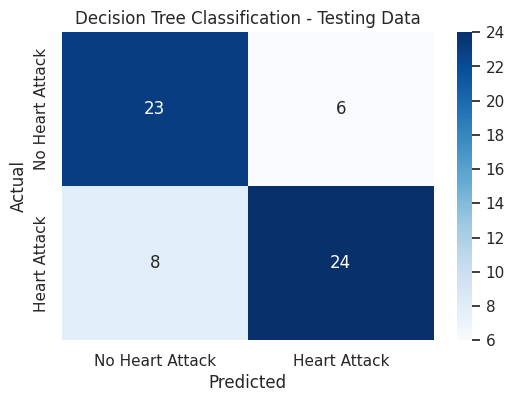

In [45]:
#****** Confusion Matrix Plot ******

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Heart Attack', 'Heart Attack'], yticklabels=['No Heart Attack', 'Heart Attack'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
plot_confusion(y_train, y_pred_logistic_train, 'Logistic Regression - Training Data')
plot_confusion(y_test, y_pred_logistic_test, 'Logistic Regression - Testing Data')
plot_confusion(y_train, y_pred_tree_train, 'Decision Tree Classification - Training Data')
plot_confusion(y_test, y_pred_tree_test, 'Decision Tree Classification - Testing Data')

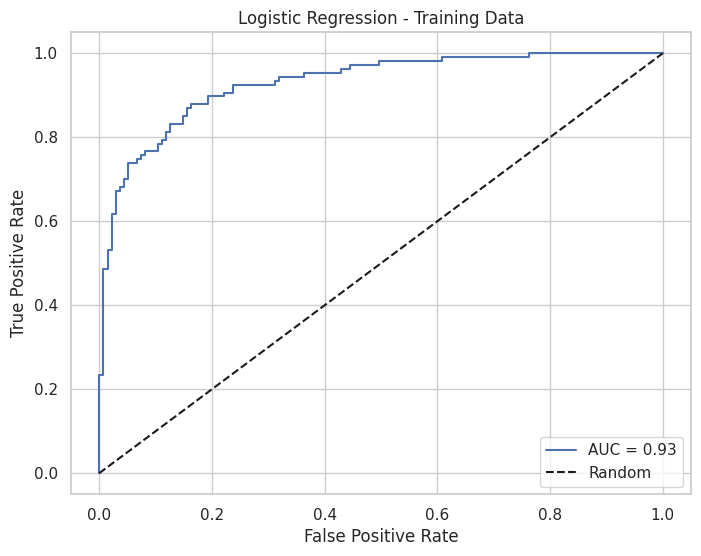

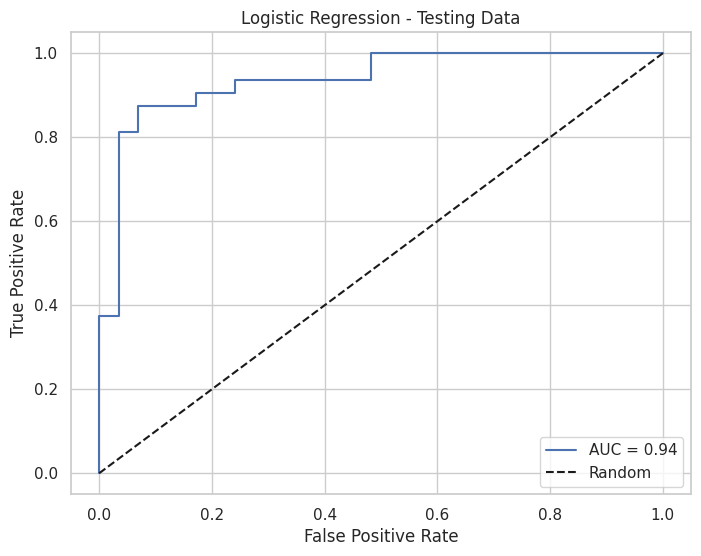

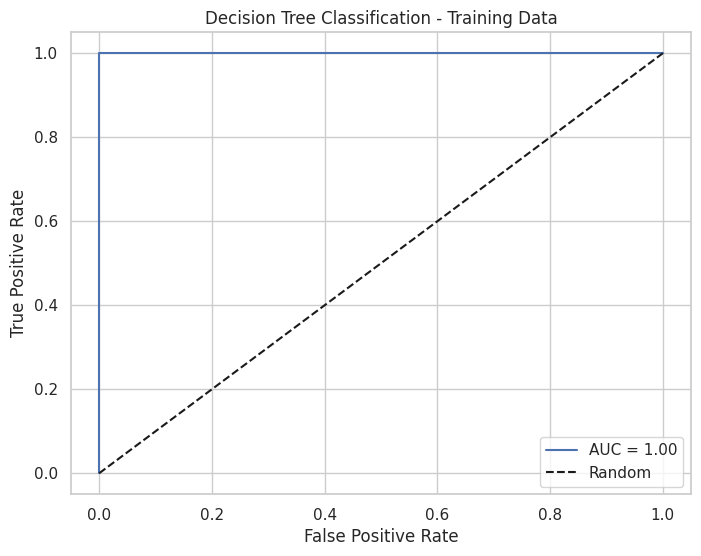

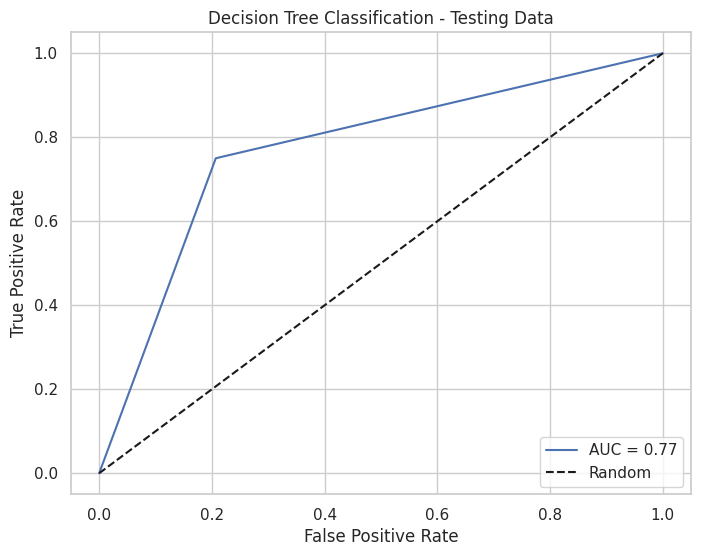

In [46]:
#****** Methods Comparison using ROC curve ******

def plot_roc_curve(y_true, y_scores, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Converting 'Yes' and 'No' to 1 and 0 in the target variable
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)
y_test_numeric = label_encoder.transform(y_test)
# Logistic Regression - Training Data
y_scores_logistic_train = logistic_model.predict_proba(X_train_encoded)[:, 1]
plot_roc_curve(y_train_numeric, y_scores_logistic_train, 'Logistic Regression - Training Data')
# Logistic Regression - Testing Data
y_scores_logistic_test = logistic_model.predict_proba(X_test_encoded)[:, 1]
plot_roc_curve(y_test_numeric, y_scores_logistic_test, 'Logistic Regression - Testing Data')
# Decision Tree Classification - Training Data
y_scores_tree_train = tree_model.predict_proba(X_train_encoded)[:, 1]
plot_roc_curve(y_train_numeric, y_scores_tree_train, 'Decision Tree Classification - Training Data')
# Decision Tree Classification - Testing Data
y_scores_tree_test = tree_model.predict_proba(X_test_encoded)[:, 1]
plot_roc_curve(y_test_numeric, y_scores_tree_test, 'Decision Tree Classification - Testing Data')

# ***Part - 2: Insurance data analysis***

In [47]:
#importing all the relevant packages to be used

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [48]:
df = pd.read_csv('/content/Insurance.csv')

In [49]:
# Dropping the first column

df = df.iloc[:, 1:]
print(df)

      City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  \
0            C3         3213            Rented          Individual         36   
1            C5         1117             Owned               Joint         75   
2            C5         3732             Owned          Individual         32   
3           C24         4378             Owned               Joint         52   
4            C8         2190            Rented          Individual         44   
...         ...          ...               ...                 ...        ...   
50877        C4          845            Rented          Individual         22   
50878        C5         4188            Rented          Individual         27   
50879        C1          442            Rented          Individual         63   
50880        C1            4             Owned               Joint         71   
50881        C3         3866            Rented          Individual         24   

       Lower_Age Is_Spouse 

In [50]:
print(df.describe())

        Region_Code     Upper_Age     Lower_Age  Holding_Policy_Type  \
count  50882.000000  50882.000000  50882.000000         30631.000000   
mean    1732.788707     44.856275     42.738866             2.439228   
std     1424.081652     17.310271     17.319375             1.025923   
min        1.000000     18.000000     16.000000             1.000000   
25%      523.000000     28.000000     27.000000             1.000000   
50%     1391.000000     44.000000     40.000000             3.000000   
75%     2667.000000     59.000000     57.000000             3.000000   
max     6194.000000     75.000000     75.000000             4.000000   

       Reco_Policy_Cat  Reco_Policy_Premium      Response  
count     50882.000000         50882.000000  50882.000000  
mean         15.115188         14183.950069      0.239947  
std           6.340663          6590.074873      0.427055  
min           1.000000          2280.000000      0.000000  
25%          12.000000          9248.000000      0.

In [51]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                50882 non-null  object 
 1   Region_Code              50882 non-null  int64  
 2   Accomodation_Type        50882 non-null  object 
 3   Reco_Insurance_Type      50882 non-null  object 
 4   Upper_Age                50882 non-null  int64  
 5   Lower_Age                50882 non-null  int64  
 6   Is_Spouse                50882 non-null  object 
 7   Health Indicator         39191 non-null  object 
 8   Holding_Policy_Duration  30631 non-null  object 
 9   Holding_Policy_Type      30631 non-null  float64
 10  Reco_Policy_Cat          50882 non-null  int64  
 11  Reco_Policy_Premium      50882 non-null  float64
 12  Response                 50882 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 5.0+ MB
None


In [52]:
print(df.isnull().sum())

City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64


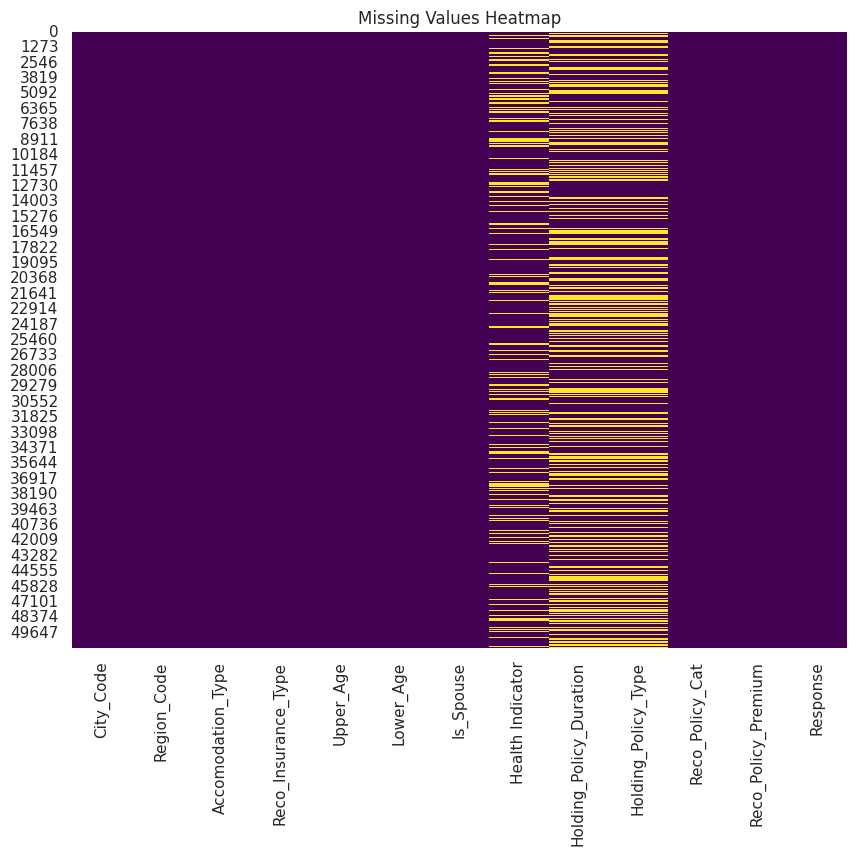

In [53]:
#****** Heatmap to visualise missing values ******
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [54]:
#****** missing values percentage calculation ******
missing_percentage = df.isnull().mean() * 100
missing_info = pd.DataFrame({'Column': df.columns, 'Missing Percentage': missing_percentage})
missing_info = missing_info.sort_values(by='Missing Percentage', ascending=False)
print(missing_info)

                                          Column  Missing Percentage
Holding_Policy_Duration  Holding_Policy_Duration           39.799929
Holding_Policy_Type          Holding_Policy_Type           39.799929
Health Indicator                Health Indicator           22.976691
City_Code                              City_Code            0.000000
Region_Code                          Region_Code            0.000000
Accomodation_Type              Accomodation_Type            0.000000
Reco_Insurance_Type          Reco_Insurance_Type            0.000000
Upper_Age                              Upper_Age            0.000000
Lower_Age                              Lower_Age            0.000000
Is_Spouse                              Is_Spouse            0.000000
Reco_Policy_Cat                  Reco_Policy_Cat            0.000000
Reco_Policy_Premium          Reco_Policy_Premium            0.000000
Response                                Response            0.000000


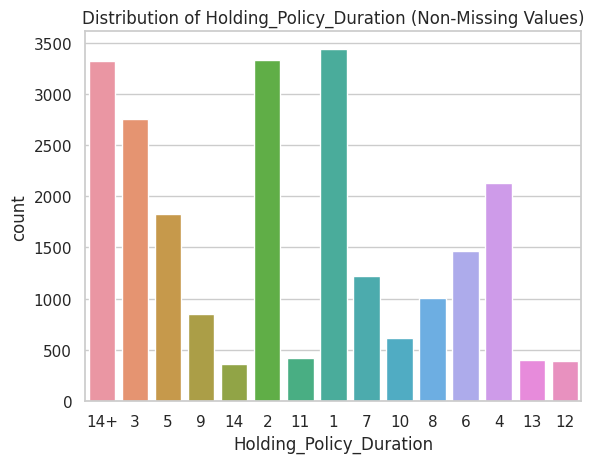

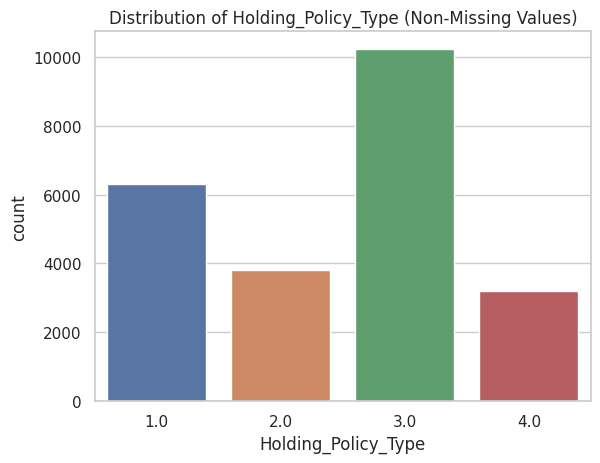

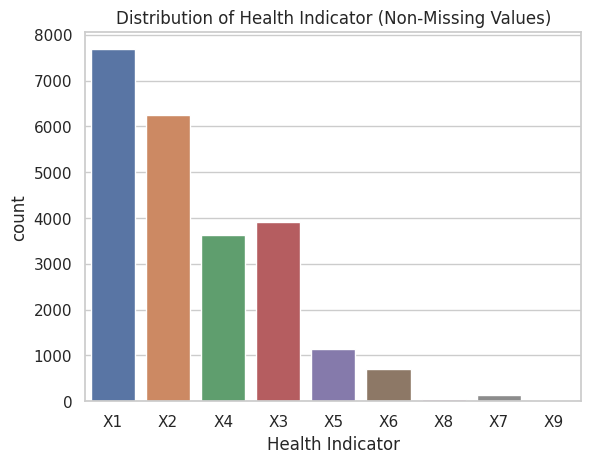

In [55]:
#****** Countplot for Non-Missing Values ******

# Holding_Policy_Duration
sns.countplot(x='Holding_Policy_Duration', data=df.dropna())
plt.title('Distribution of Holding_Policy_Duration (Non-Missing Values)')
plt.show()
# Holding_Policy_Type
sns.countplot(x='Holding_Policy_Type', data=df.dropna())
plt.title('Distribution of Holding_Policy_Type (Non-Missing Values)')
plt.show()
# Health Indicator
sns.countplot(x='Health Indicator', data=df.dropna())
plt.title('Distribution of Health Indicator (Non-Missing Values)')
plt.show()

In [56]:
# Dropping rows with missing values

df.dropna(inplace=True)

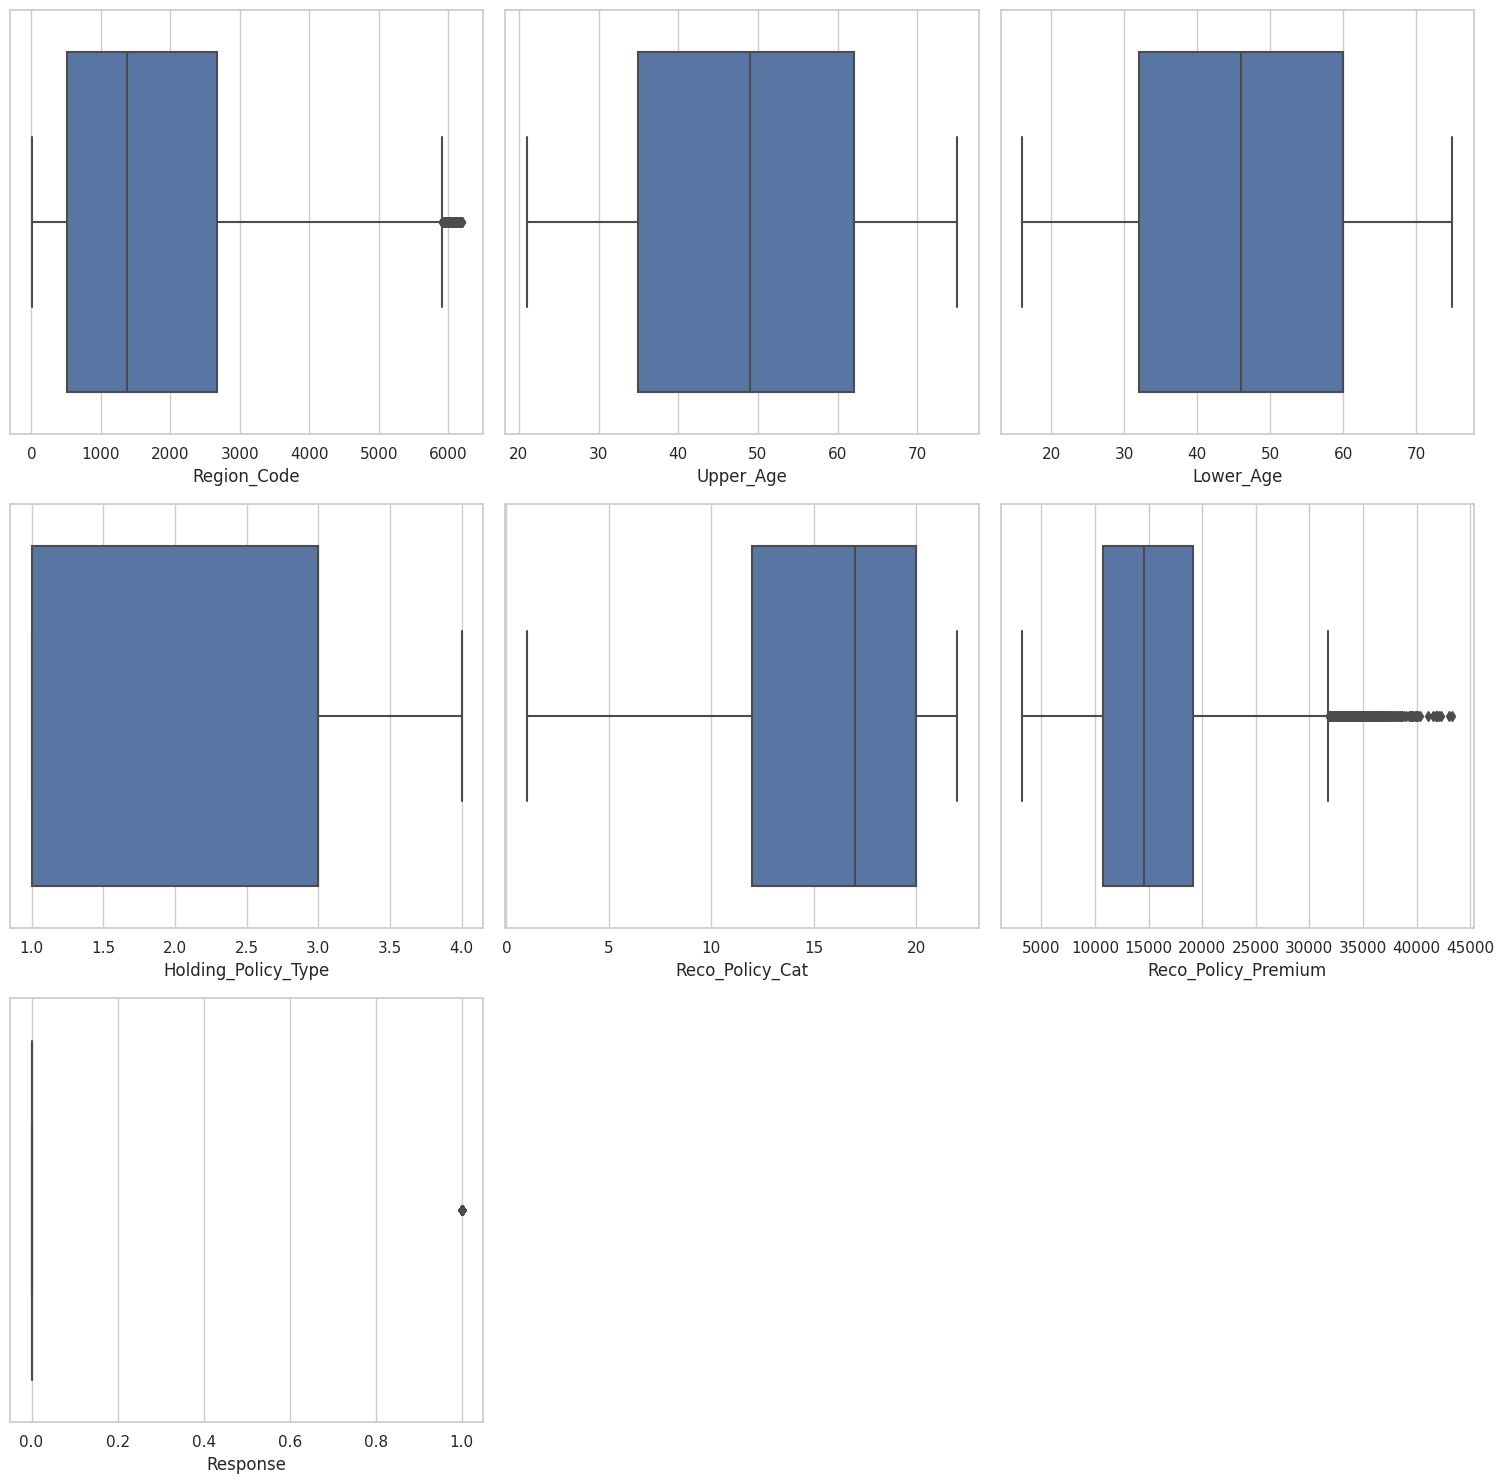

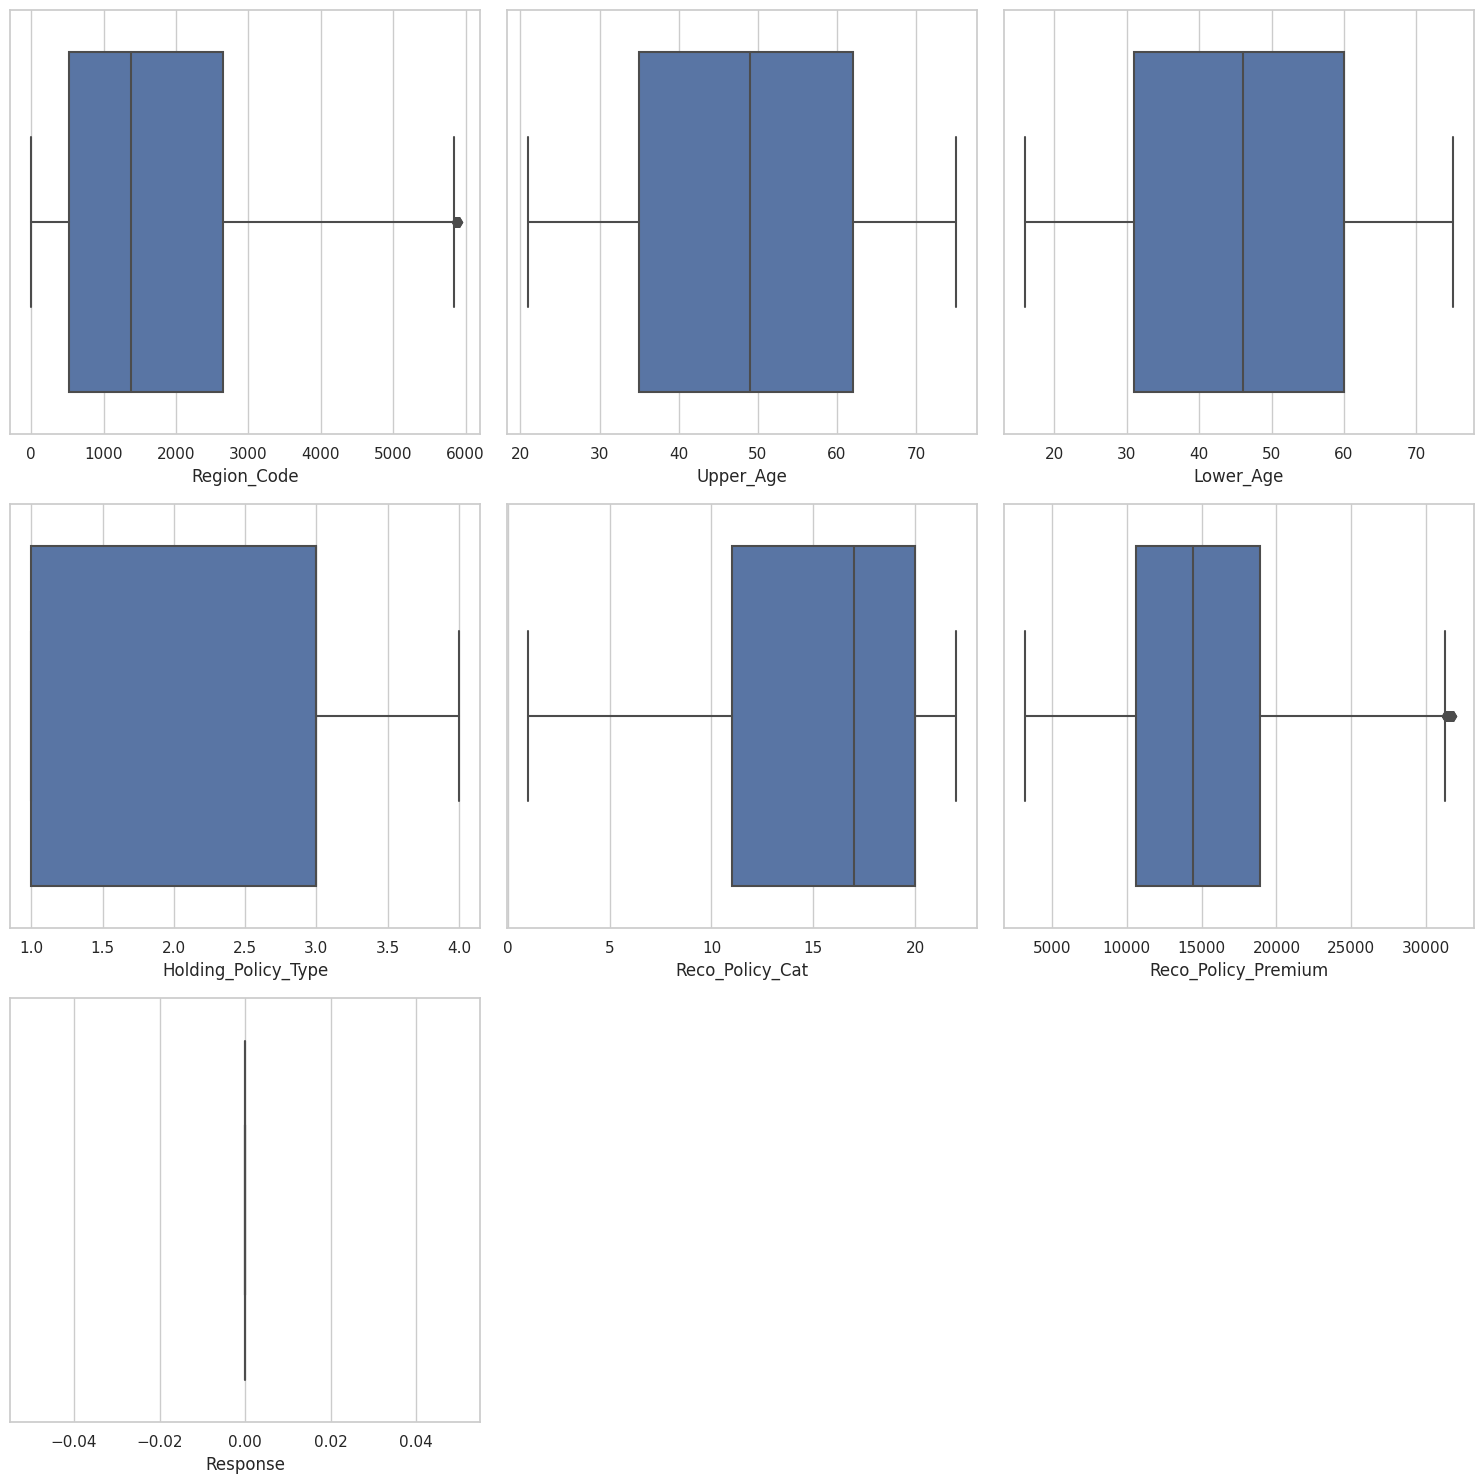

In [57]:
#****** univariate data analysis ******

#Part_1:Box plots and outliers removal through IQR method

numerical_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns
#Displaying and creating with dynamic layout adjustment
num_cols = len(numerical_cols)
num_rows = 2
num_cols_per_row = 3
num_subplot_rows = math.ceil(num_cols / num_cols_per_row)
plt.figure(figsize=(15, 5 * num_subplot_rows))
sns.set(style="whitegrid")
for i, col in enumerate(numerical_cols):
    plt.subplot(num_subplot_rows, num_cols_per_row, i + 1)
    sns.boxplot(x=df[col])
plt.tight_layout()
plt.show()

#IQR
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5
df_no_outliers = df[~((df[numerical_cols] < (Q1 - outlier_threshold * IQR)) | (df[numerical_cols] > (Q3 + outlier_threshold * IQR))).any(axis=1)]

#Displaying and creating with dynamic layout adjustment after removal of outliers
plt.figure(figsize=(15, 5 * num_subplot_rows))
sns.set(style="whitegrid")
for i, col in enumerate(numerical_cols):
    plt.subplot(num_subplot_rows, num_cols_per_row, i + 1)
    sns.boxplot(x=df_no_outliers[col])
plt.tight_layout()
plt.show()

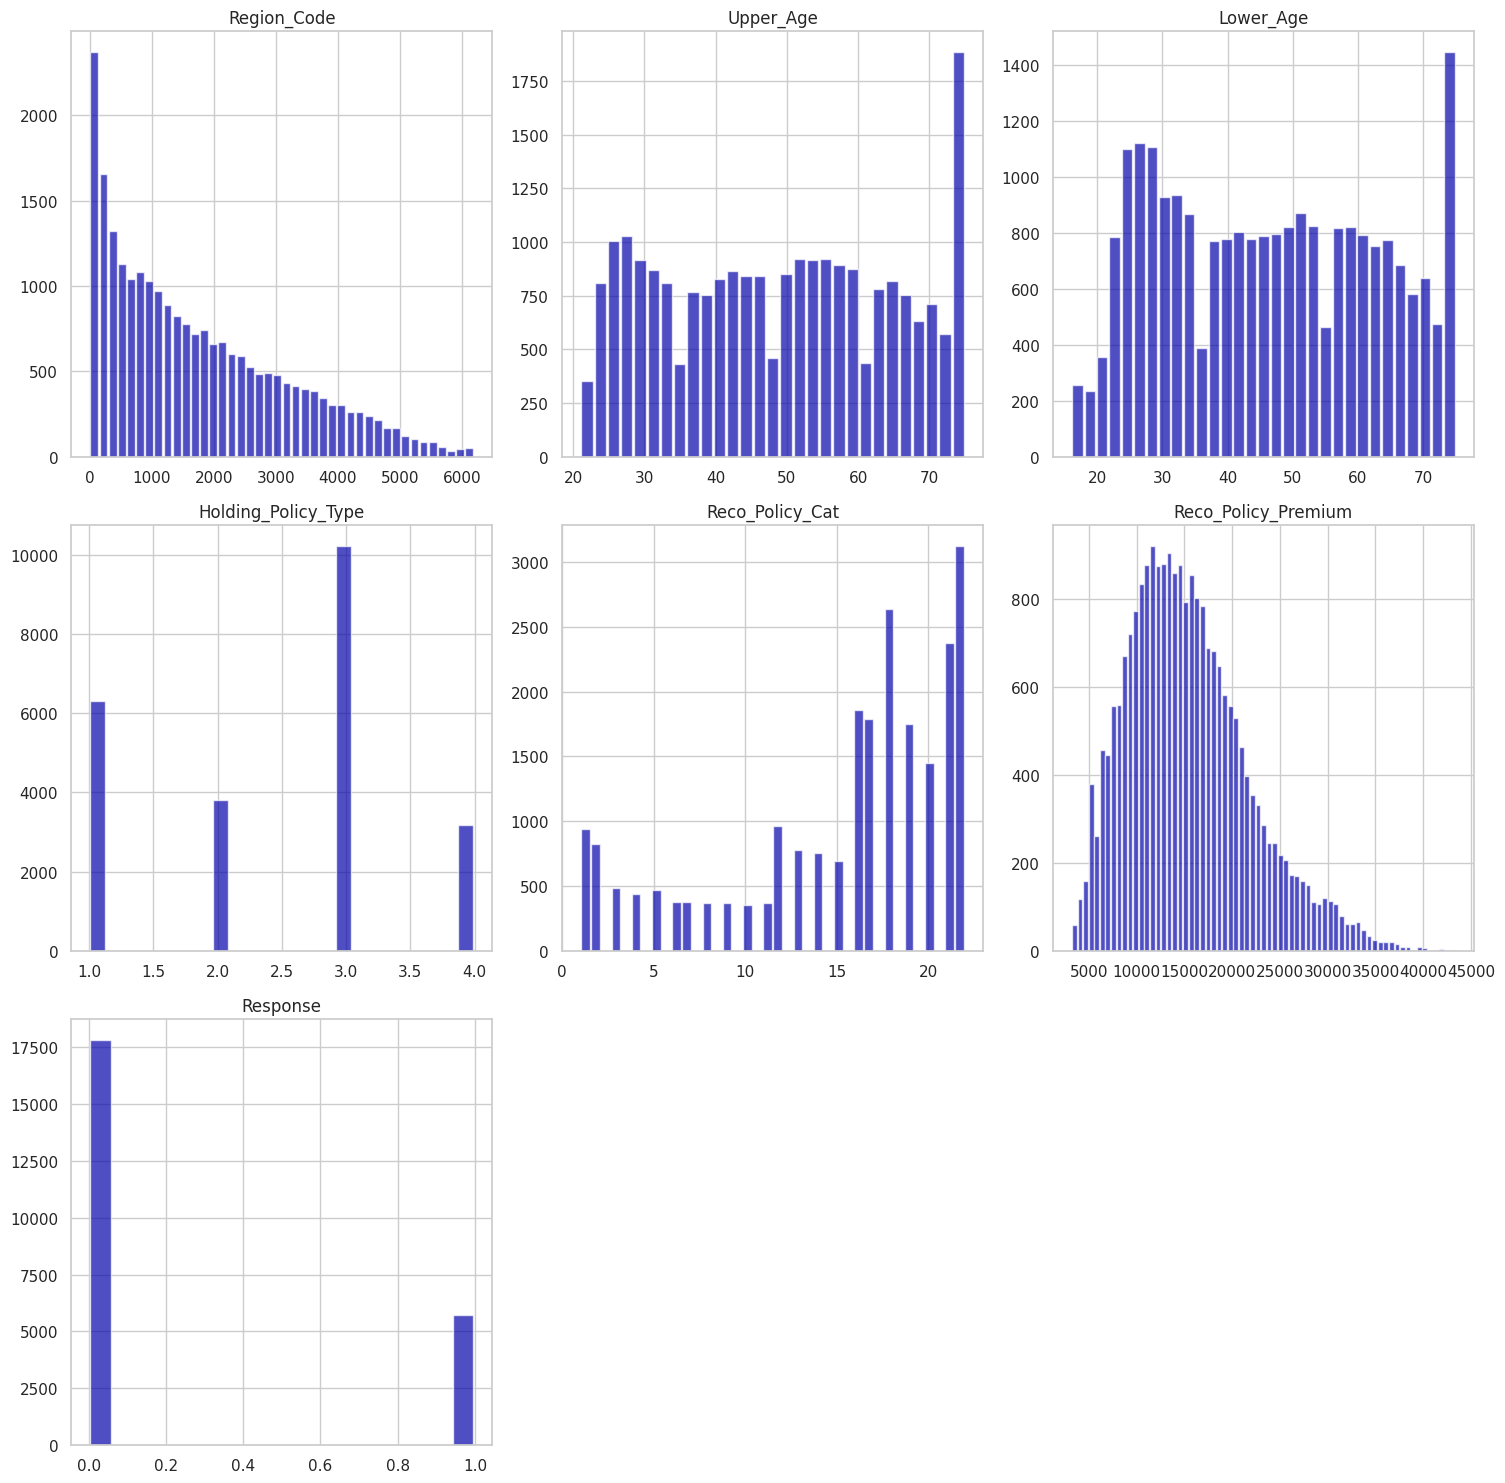

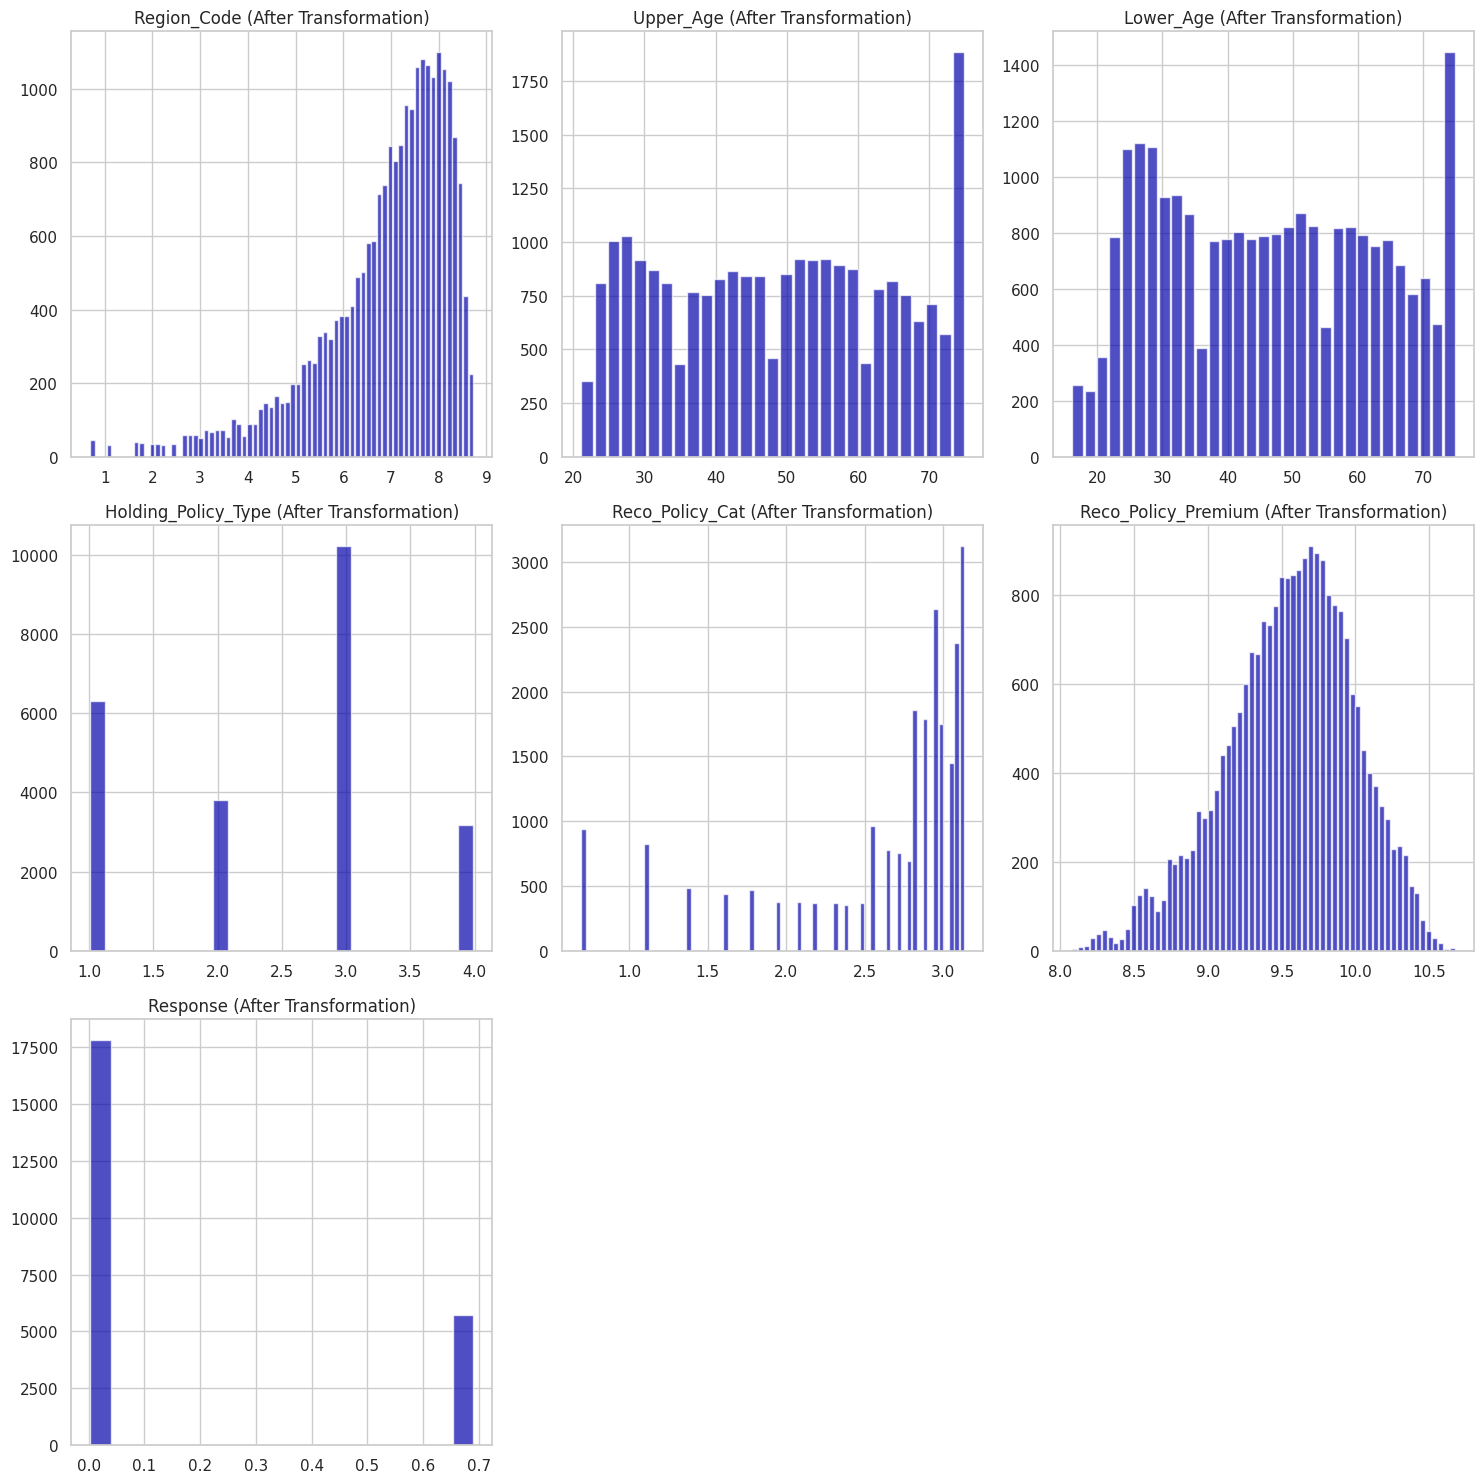

In [58]:
#part_2:Histogram plot and transformation of skewed columns

# Displaying and creating histogram for numerical columns
plt.figure(figsize=(15, 5 * num_subplot_rows))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_subplot_rows, num_cols_per_row, i + 1)  # Adjust subplot layout dynamically
    plt.hist(df[col], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
    plt.title(col)
plt.tight_layout()
plt.show()

# Checking and transforming skewed numerical columns crossing the skewness threshold using logarithmic transformation
skewness_threshold = 0.5
skewed_cols = df[numerical_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_cols = skewed_cols[abs(skewed_cols) > skewness_threshold].index
for col in skewed_cols:
    df[col] = np.log1p(df[col])

# Displaying and creating histograms for numerical columns after transformation is done
plt.figure(figsize=(15, 5 * num_subplot_rows))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_subplot_rows, num_cols_per_row, i + 1)  # Adjusting subplot layout dynamically
    plt.hist(df[col], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
    plt.title(col + ' (After Transformation)')
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

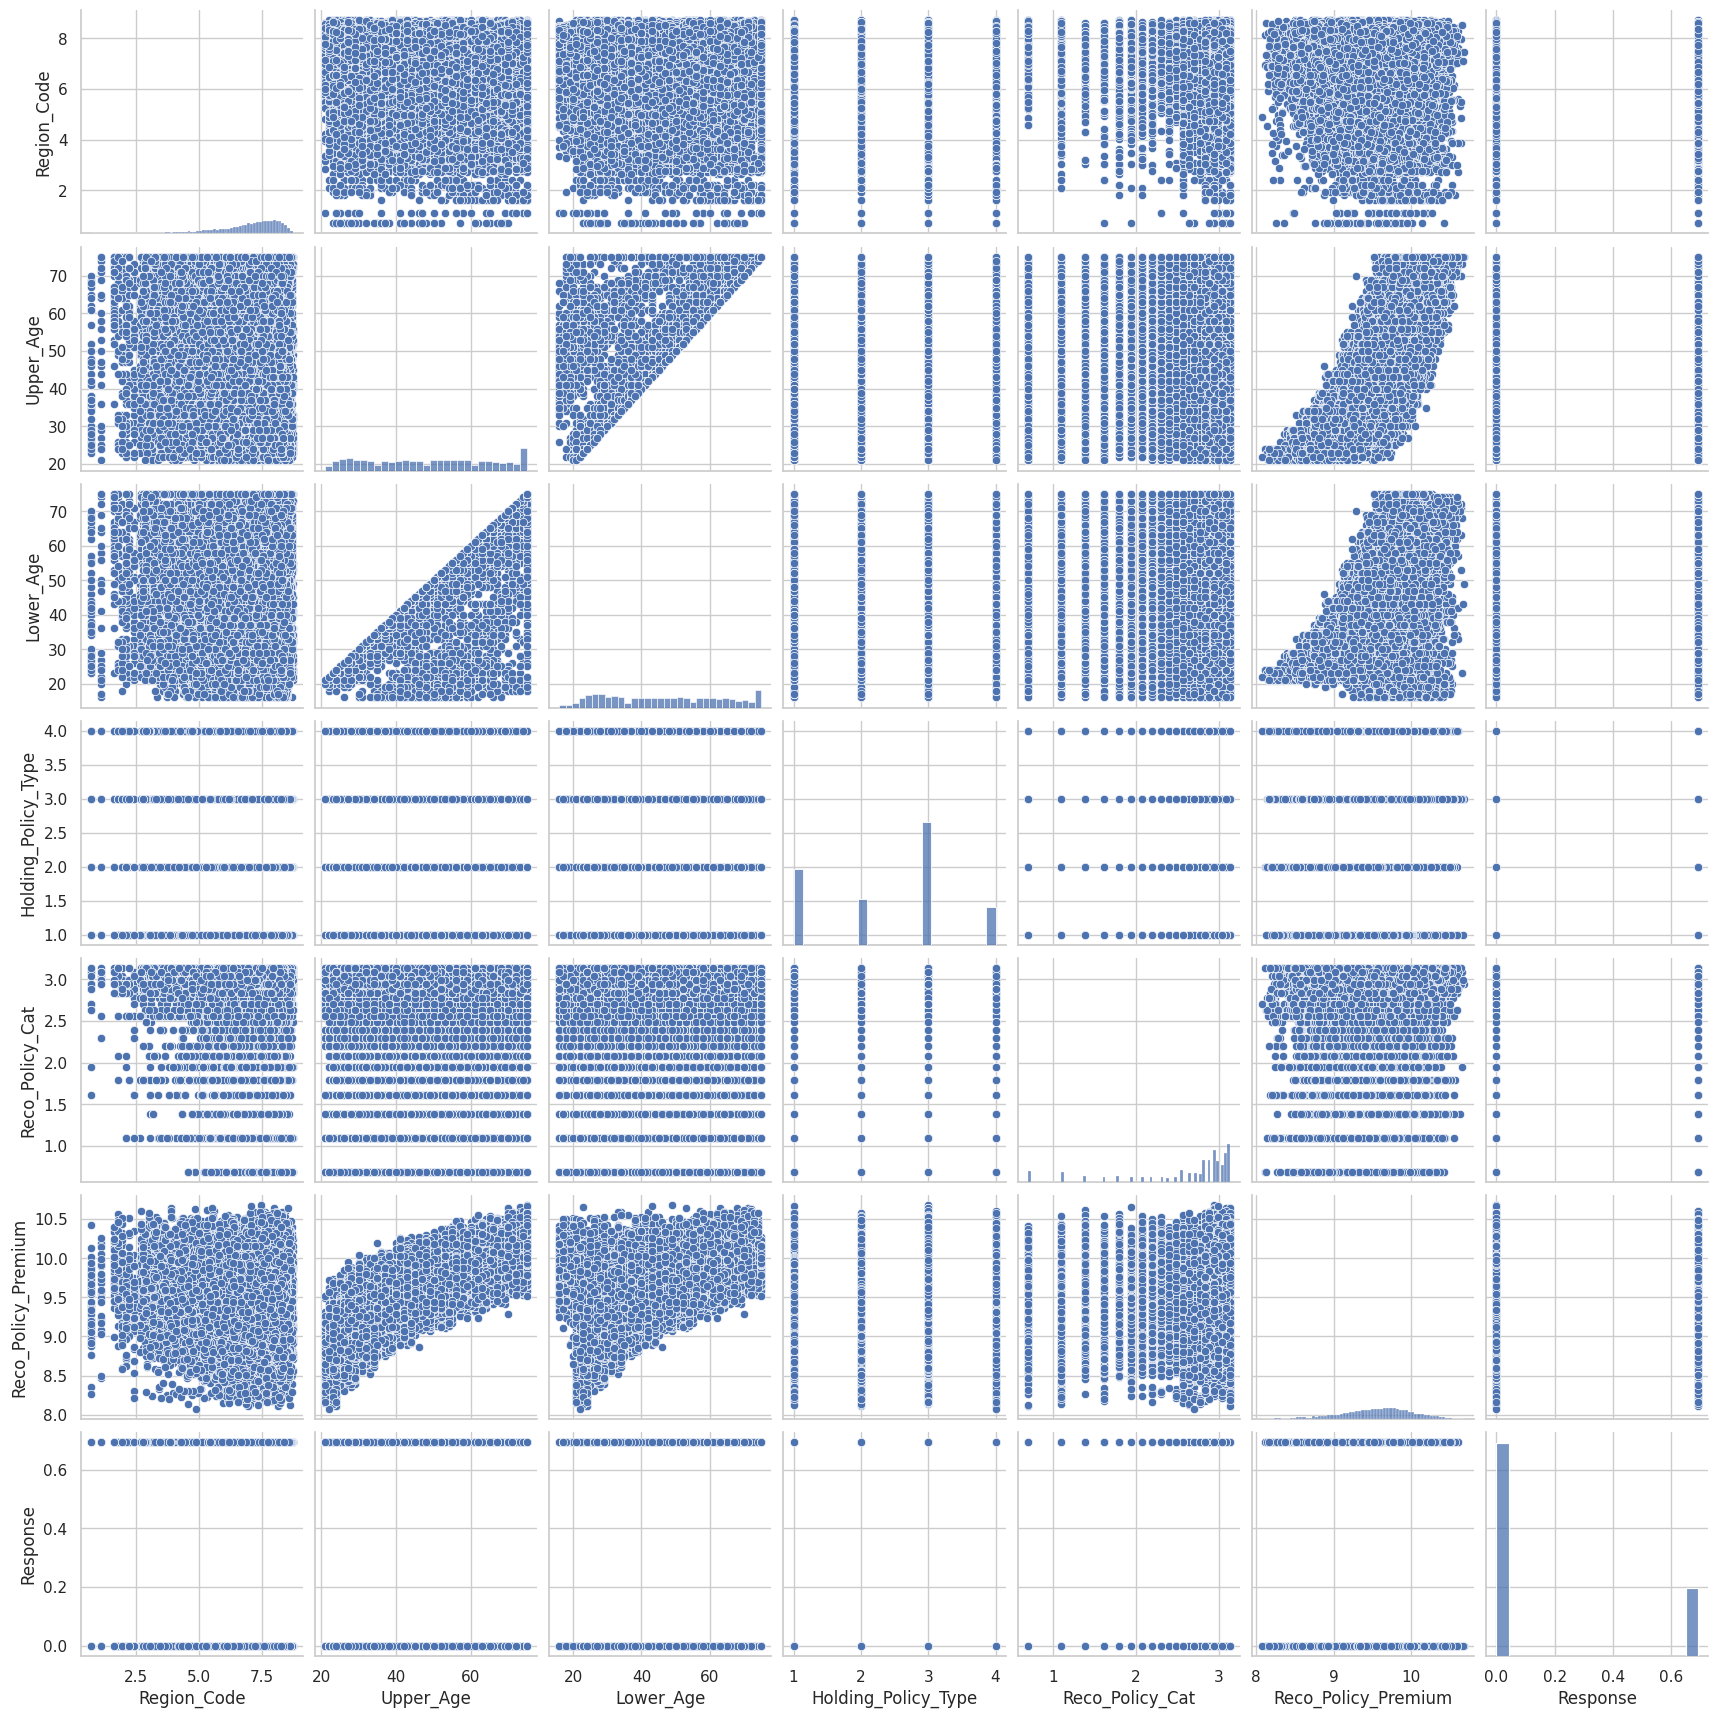

In [59]:
#****** Bivariate data Analysis ******

#displaying and creating scatter plot
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
sns.pairplot(df[numerical_cols])
plt.show()

<ipython-input-60-837507dcf561>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


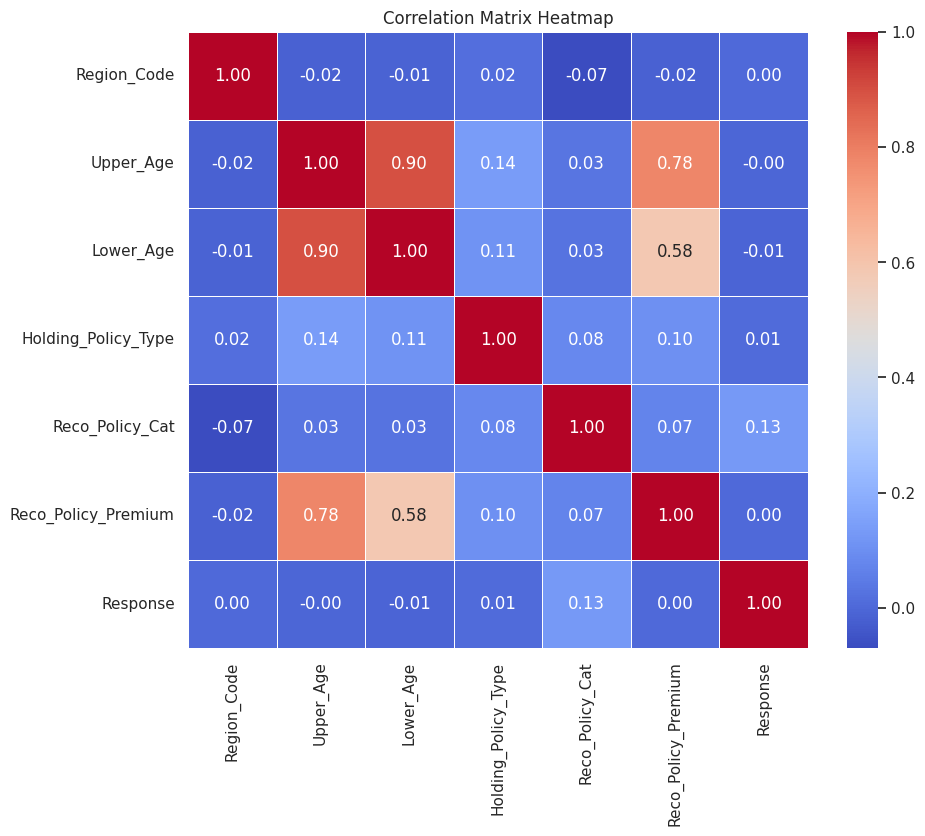

<ipython-input-60-837507dcf561>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_no_high_correlation.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


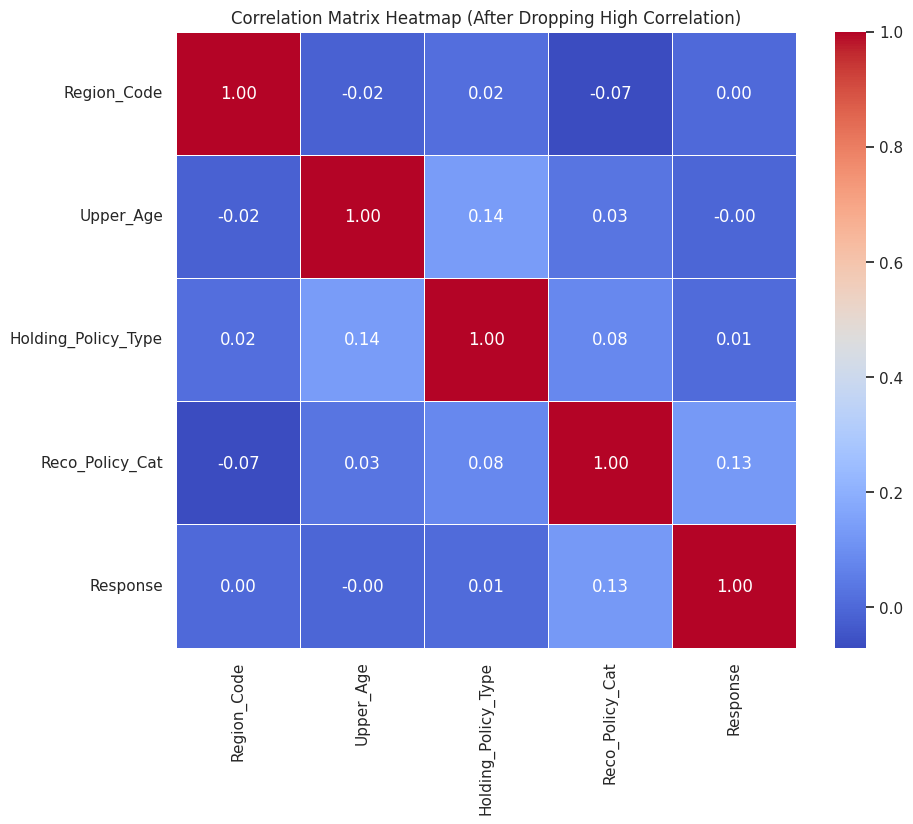

In [60]:
#****** Multivariate data Analysis ******

# Calculating correlation matrix and displaying its heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Identifying and dropping columns with high correlation with the threshold of 0.7
correlation_threshold = 0.7
highly_correlated_cols = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_cols.add(colname_j)
df_no_high_correlation = df.drop(columns=highly_correlated_cols)

# Displaying heatmap of the correlation matrix after dropping columns
plt.figure(figsize=(10, 8))
sns.heatmap(df_no_high_correlation.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (After Dropping High Correlation)")
plt.show()

In [61]:
#****** Feature Scaling ******

# Identifying numerical columns and doing feature scaling it for them
numerical_cols_for_scaling = df_no_high_correlation.select_dtypes(include='number').columns
scaler = StandardScaler()
df_scaled = df_no_high_correlation.copy()
df_scaled[numerical_cols_for_scaling] = scaler.fit_transform(df_no_high_correlation[numerical_cols_for_scaling])
print(df_scaled.head())

  City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  \
0        C3     0.864955            Rented          Individual  -0.802952   
3       C24     1.088514             Owned               Joint   0.195730   
4        C8     0.588015            Rented          Individual  -0.303611   
5        C9     0.440293            Rented          Individual   0.195730   
7        C1     0.856358             Owned               Joint   1.631334   

  Is_Spouse Health Indicator Holding_Policy_Duration  Holding_Policy_Type  \
0        No               X1                     14+             0.548230   
3        No               X1                     14+             0.548230   
4        No               X2                       3            -1.401291   
5        No               X2                       5            -1.401291   
7       Yes               X4                       9             1.522991   

   Reco_Policy_Cat  Response  
0         0.768904 -0.565123  
3         0.

In [62]:
#****** Models and prediction evaluation ******

# Assuming 'Response' is originally a continuous variable
df_scaled['Response'] = df_scaled['Response'].astype(int)  # Convert to integer
df_scaled['Response'] = df_scaled['Response'].astype('category')  # Convert to categorical

# Separating features and target variable
X = df_scaled.drop('Response', axis=1)
y = df_scaled['Response']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifying categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# One-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_cols)
    ],
    remainder='passthrough'
)

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_encoded, y_train)

# Predictions on the test and train set
y_pred_dt = dt_classifier.predict(X_test_encoded)
y_train_pred_dt = dt_classifier.predict(X_train_encoded)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100,random_state=42)
rf_classifier.fit(X_train_encoded, y_train)

# Predictions on the test and train set
y_pred_rf = rf_classifier.predict(X_test_encoded)
y_train_pred_rf = rf_classifier.predict(X_train_encoded)

# Evaluating models on training set
print("Decision Tree Classifier (Training Set):")
print("Accuracy:", accuracy_score(y_train, y_train_pred_dt))
print("Classification Report:\n", classification_report(y_train, y_train_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_dt))

print("\nRandom Forest Classifier (Training Set):")
print("Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Classification Report:\n", classification_report(y_train, y_train_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_rf))

# Evaluating models on testing set
print("\nDecision Tree Classifier (Testing Set):")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

print("\nRandom Forest Classifier (Testing Set):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Decision Tree Classifier (Training Set):
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14284
           1       1.00      1.00      1.00      4554

    accuracy                           1.00     18838
   macro avg       1.00      1.00      1.00     18838
weighted avg       1.00      1.00      1.00     18838

Confusion Matrix:
 [[14284     0]
 [    0  4554]]

Random Forest Classifier (Training Set):
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14284
           1       1.00      1.00      1.00      4554

    accuracy                           1.00     18838
   macro avg       1.00      1.00      1.00     18838
weighted avg       1.00      1.00      1.00     18838

Confusion Matrix:
 [[14284     0]
 [    0  4554]]

Decision Tree Classifier (Testing Set):
Accuracy: 0.6581740976645435
Classification Re

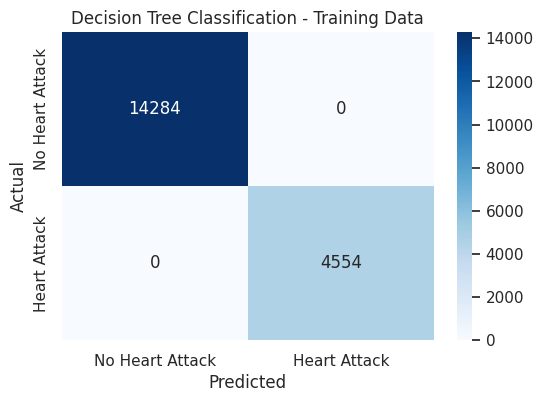

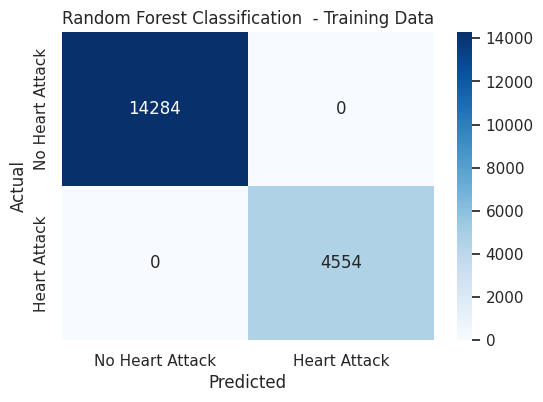

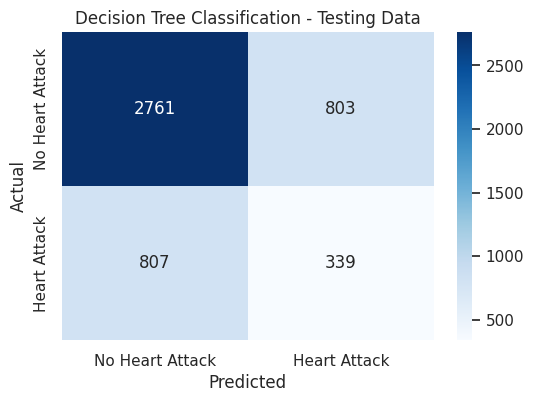

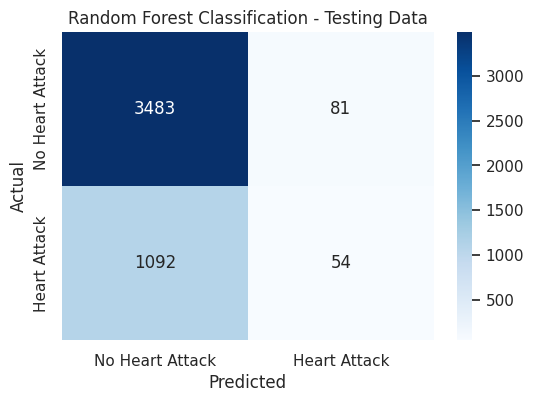

In [63]:
#****** Confusion Matrix Plot ******

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Heart Attack', 'Heart Attack'], yticklabels=['No Heart Attack', 'Heart Attack'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
plot_confusion(y_train, y_train_pred_dt, 'Decision Tree Classification - Training Data')
plot_confusion(y_train, y_train_pred_rf, 'Random Forest Classification  - Training Data')
plot_confusion(y_test, y_pred_dt, 'Decision Tree Classification - Testing Data')
plot_confusion(y_test, y_pred_rf, 'Random Forest Classification - Testing Data')

In [64]:
#****** K-Fold cross validation (accuracy Testing) ******

# defining cross validation
num_folds = 5
cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
dt_cv_scores_train = cross_val_score(dt_classifier, X_train_encoded, y_train, cv=cv_strategy, scoring='accuracy')
rf_cv_scores_train = cross_val_score(rf_classifier, X_train_encoded, y_train, cv=cv_strategy, scoring='accuracy')
dt_cv_scores_test = cross_val_score(dt_classifier, X_test_encoded, y_test, cv=cv_strategy, scoring='accuracy')
rf_cv_scores_test = cross_val_score(rf_classifier, X_test_encoded, y_test, cv=cv_strategy, scoring='accuracy')

# Displaying the results
print("Decision Tree Classifier - Cross-validation scores (Training Set):", dt_cv_scores_train)
print("Average Accuracy (Training Set):", dt_cv_scores_train.mean())
print("\nRandom Forest Classifier - Cross-validation scores (Training Set):", rf_cv_scores_train)
print("Average Accuracy (Training Set):", rf_cv_scores_train.mean())
print("\nDecision Tree Classifier - Cross-validation scores (Testing Set):", dt_cv_scores_test)
print("Average Accuracy (Testing Set):", dt_cv_scores_test.mean())
print("\nRandom Forest Classifier - Cross-validation scores (Testing Set):", rf_cv_scores_test)
print("Average Accuracy (Testing Set):", rf_cv_scores_test.mean())

Decision Tree Classifier - Cross-validation scores (Training Set): [0.67038217 0.66454352 0.6616242  0.67188744 0.65834882]
Average Accuracy (Training Set): 0.6653572312241125

Random Forest Classifier - Cross-validation scores (Training Set): [0.75504246 0.7537155  0.75610403 0.75444651 0.75471197]
Average Accuracy (Training Set): 0.7548040954608042

Decision Tree Classifier - Cross-validation scores (Testing Set): [0.65711253 0.66135881 0.66454352 0.67622081 0.6507431 ]
Average Accuracy (Testing Set): 0.661995753715499

Random Forest Classifier - Cross-validation scores (Testing Set): [0.74840764 0.74840764 0.7537155  0.74309979 0.74734607]
Average Accuracy (Testing Set): 0.7481953290870488


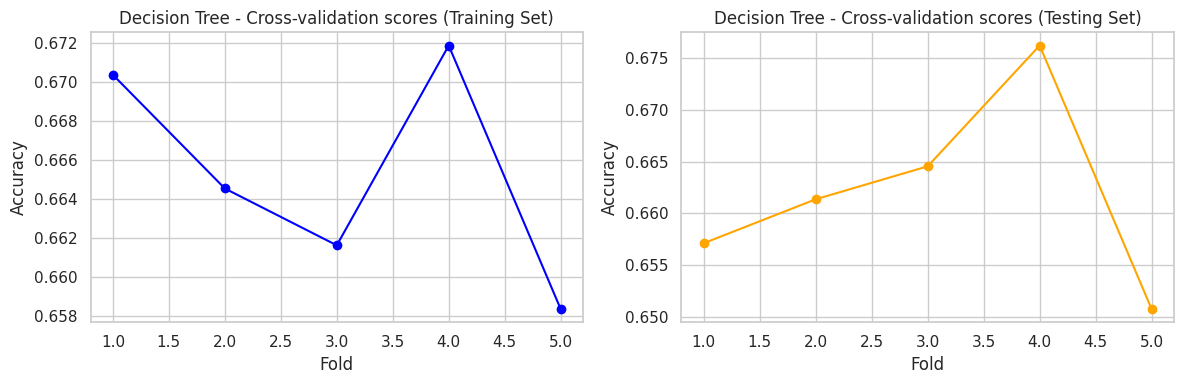

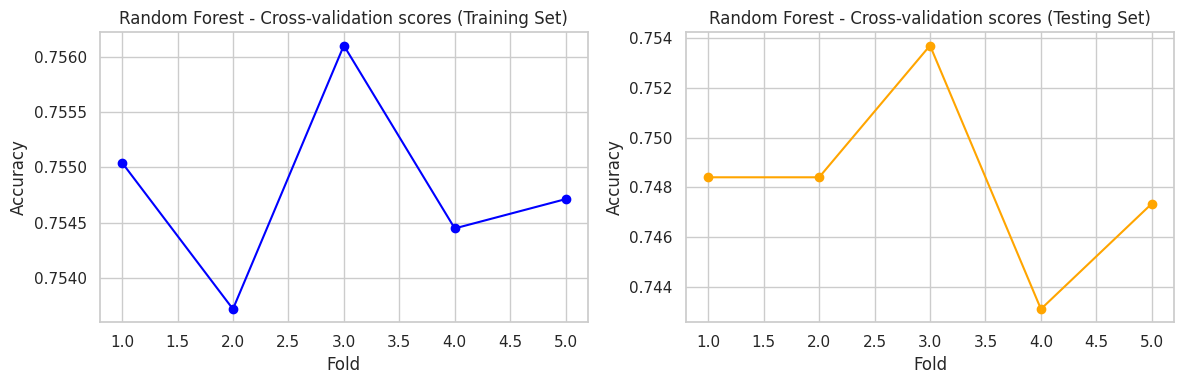

In [65]:
#****** Plotting K-Fold cross validation results ******

def plot_cross_val_results(cv_scores_train, cv_scores_test, classifier_name):
    plt.figure(figsize=(12, 4))
    for i, (cv_scores, dataset_name) in enumerate(zip([cv_scores_train, cv_scores_test], ['Training Set', 'Testing Set']), start=1):
        plt.subplot(1, 2, i)
        plt.plot(np.arange(1, num_folds + 1), cv_scores, marker='o', linestyle='-', color='blue' if dataset_name == 'Training Set' else 'orange')
        plt.title(f'{classifier_name} - Cross-validation scores ({dataset_name})')
        plt.xlabel('Fold')
        plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.show()

plot_cross_val_results(dt_cv_scores_train, dt_cv_scores_test, 'Decision Tree')
plot_cross_val_results(rf_cv_scores_train, rf_cv_scores_test, 'Random Forest')

# ***END OF PROJECT***



